<div style="text-align: left;">
    <img src="https://www.datakind.org/wp-content/uploads/2023/04/DK_LOGO_R_ORG.svg" width="300">
</div>

# DataKind: Financial Inclusion & Economic Opportunity - Kenya

We carry out Exploratory Data Analysis of the Kenya [2024 FinAccess Household Survey](https://finaccess.knbs.or.ke/reports-and-datasets) for the DataKind event 'Exploring International Economic Opportunity Data and Insights'.

## 1 Imports

We import relevant Python packages.

In [150]:
# Operational packages
import numpy as np
import pandas as pd
import warnings

# Visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


We load the *2024 FinAccess Household Survey* dataset into a pandas DataFrame and store it in the variable **finaccess**.

In [102]:
# import data
finaccess = pd.read_stata('/kaggle/input/kenya-finaccess-household-survey-2024/2024_Finaccess_Publicdata.dta', convert_categoricals=False)

## 2 Data Exploration

### 2.1 Exploration & Cleaning

We display the first 10 rows of the DataFrame.

In [103]:
# suppress warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# check first 5 rows
finaccess.head()

,interview__key,interview__id,county,A07,A08,A10,Interview_Status,A9i,Z1,A13,...,sacco_redress,mobilemoney_redress,mobilebank_redress,not_registered_mmoney_24,using_someone_acc,insurance_including_NHIF_use,All_Insurance_excluding_NHIF_use,PWD,Latitude,Longitude
0,21-61-43-44,00005e63e7424aa19e63adb071955233,7,225,2,1,1,1,1,1,...,NaN,NaN,NaN,0,NaN,3,3,0,-0.435423,39.636586
1,87-78-54-60,000718d26f5942998522033a66594b4c,7,223,2,3,1,1,1,1,...,NaN,NaN,NaN,0,NaN,3,3,0,0.058794,40.305006
2,32-71-19-84,0008721681d2468aa1ef456bba4475dc,40,1514,2,3,1,1,1,2,...,NaN,NaN,NaN,0,NaN,3,3,0,0.636836,34.277390
3,48-18-78-99,00099e961d49470585c1a7f49fa3b7fb,22,796,2,3,1,1,1,1,...,NaN,NaN,NaN,0,NaN,3,3,0,-1.251917,36.719076
4,50-82-98-89,000bb72e959b4dd48443da902c01e920,21,763,2,16,1,1,1,2,...,NaN,NaN,NaN,0,1.0,3,3,0,-0.795820,37.131085


We observe that the dataset contains 3,816 columns, corresponding to [survey interview questions](https://drive.google.com/file/d/1Niz_--3sC4au5gnD2-cA5z3VCKH-SqwA/view) encoded with labels such as A01, A02, and so on.

We create a subset of the DataFrame containing the variables relevant to our analysis.
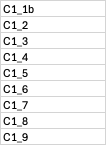
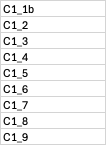
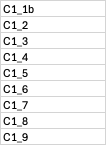
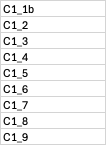
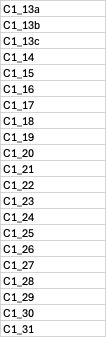
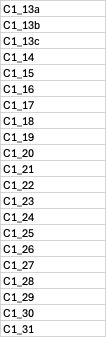
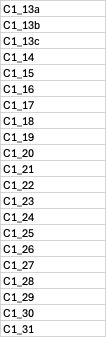
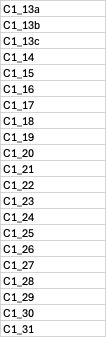

In [104]:
# List of columns to keep
columns_to_keep = ['interview__key', 'interview__id', 'county', 'A07', 'A13', 'A14i', 'A12ii_length',
                   'C1_10', 'C1_11', 'C1_12',
                   'C1_1a', 'C1_1b', 'C1_2', 'C1_3', 'C1_4', 'C1_5', 'C1_6', 'C1_7', 'C1_8', 'C1_9',
                   'C1_13a', 'C1_13b', 'C1_13c', 'C1_14', 'C1_15', 'C1_16', 'C1_17', 'C1_18', 'C1_19', 'C1_20', 'C1_21', 'C1_22', 'C1_23', 'C1_24', 'C1_25', 'C1_26', 'C1_27', 'C1_28', 'C1_29', 'C1_30', 'C1_31',
                   'H10i__3', 'H10i__4', 'H10i__7',
                   'B3Bi',
                   'B3A__1', 'B3A__2', 'B3A__3', 'B3A__4', 'B3A__5', 'B3A__6', 'B3A__7', 'B3A__8', 'B3A__9', 'B3A__10', 'B3A__11', 'B3A__98', 'B3A__99',
                   'B3Ii',
                   'C1_40', 'C1_41', 'C1_42', 'B3A__5',
                   'S1',
                   'S2__1',
                   'T3',
                   'A08',
                   'F1__1'
                  ]

# Create a new dataframe with just those columns
subset_finaccess = finaccess[columns_to_keep].copy()

# Check the first few rows of the new subset
subset_finaccess.head()

,interview__key,interview__id,county,A07,A13,A14i,A12ii_length,C1_10,C1_11,C1_12,...,B3Ii,C1_40,C1_41,C1_42,B3A__5,S1,S2__1,T3,A08,F1__1
0,21-61-43-44,00005e63e7424aa19e63adb071955233,7,225,1,29,5,1,3,1,...,30000.0,3,3,3,0,1.0,1.0,2.0,2,0.0
1,87-78-54-60,000718d26f5942998522033a66594b4c,7,223,1,60,11,1,3,3,...,10000.0,3,3,3,0,1.0,0.0,2.0,2,0.0
2,32-71-19-84,0008721681d2468aa1ef456bba4475dc,40,1514,2,35,2,1,1,3,...,3000.0,3,3,3,0,1.0,0.0,1.0,2,0.0
3,48-18-78-99,00099e961d49470585c1a7f49fa3b7fb,22,796,1,24,1,1,2,3,...,10000.0,3,3,3,0,1.0,0.0,1.0,2,0.0
4,50-82-98-89,000bb72e959b4dd48443da902c01e920,21,763,2,20,1,1,1,1,...,10000.0,3,3,3,0,1.0,1.0,1.0,2,0.0


In [105]:
# Check the size of the new DataFrame
subset_finaccess.shape

(20871, 68)

We check the data types of the columns.

In [106]:
# Get data types of columns
subset_finaccess.dtypes

# Save data types to a CSV
subset_finaccess.dtypes.to_frame(name='dtype').to_csv('finaccess_dtypes.csv')

We observe that the categorical variables **H10i__3**, **H10i__4**, **H10i__7**, **B3Bi**, **S1**, **S2__1**, **F1__1** have been assigned the *float64* datatype rather than *int8*, likely due to the presence of missing (NaN) values.

We proceed by checking for missing values.
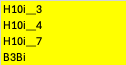
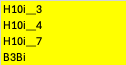
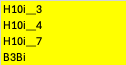
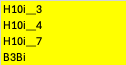
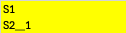
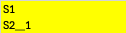
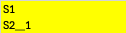
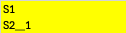

In [107]:
# Check for missing values
missing_values = subset_finaccess.isna().sum().reset_index()
missing_values.columns = ['Column', 'Missing Count']
missing_values.sort_values(by=['Missing Count'], ascending=False).head(10)

,Column,Missing Count
42,H10i__4,15719
43,H10i__7,15719
41,H10i__3,15719
44,B3Bi,14092
58,B3Ii,2378
64,S2__1,1785
65,T3,45
63,S1,44
67,F1__1,30
47,B3A__3,0


For the categorical variables, **H10i__3**, **H10i__7**, **H10i__4**, **B3Bi**, **S1**, **S2__1**, **F1__1**, we replace missing values (NaN) with 0 and convert their data types to *int8*.

In [108]:
# List of target columns
cols_to_update = ['H10i__3', 'H10i__4', 'H10i__7', 'B3Bi', 'S1', 'S2__1', 'F1__1']

# Replace NaN with 0 and convert to int8
subset_finaccess[cols_to_update] = subset_finaccess[cols_to_update].fillna(0).astype('int8')

Rows with missing values in **B3Ii** (monthly salary) are removed from the dataset.

In [109]:
# Check how many respondents reported a monthly salary (variable B3Ii) of 0.0 
(subset_finaccess['B3Ii']==0.0).sum()

0

In [110]:
# Check how many respondents reported a monthly salary (variable B3Ii) of '98' (don't know)
(subset_finaccess['B3Ii']==98.0).sum()

0

In [111]:
# Check how many respondents reported a monthly salary (variable B3Ii) of '99' (refused to answer)
(subset_finaccess['B3Ii']==99.0).sum()

0

In [112]:
# Drop rows with missing B3Ii
subset_finaccess = subset_finaccess.dropna(subset=['T3'])

Rows with missing values in **T3** (distance to the nearest financial service provider) are removed from the dataset.

In [113]:
# Drop rows with missing T3
subset_finaccess = subset_finaccess.dropna(subset=['T3'])

In [114]:
# Check for missing values
subset_finaccess.isna().sum()

interview__key    0
interview__id     0
county            0
A07               0
A13               0
                 ..
S1                0
S2__1             0
T3                0
A08               0
F1__1             0
Length: 68, dtype: int64

We check for duplicate entries and remove them if necessary.

In [115]:
# Check for duplicates
subset_finaccess.duplicated().sum()

0

In [116]:
# Drop duplicates
subset_finaccess.drop_duplicates().reset_index(drop=True)

# Re-Check the shape of the dataframe
subset_finaccess.shape

(20826, 68)

### 2.2 Data Preparation and Summary Statistics

The key financial inclusion metrics identified for evaluation are:

| Key Metric for Evaluation | Relevant Survey Variables|
|--------------------------|--------------------------|
| Account Ownership (%): Percentage of adults (15+) with an account at a financial institution or mobile money provider | C1_10, C1_11, C1_12 |
| Mobile Money Usage (%): Percentage of adults using mobile money accounts for transactions | C1_10 |
| Savings Behavior (%): Percentage of adults who saved money in the past year (formal or informal)| C1_1a, C1_1b, C1_2, C1_3, C1_4, C1_5, C1_6, C1_7, C1_8, C1_9 |
| Borrowing Behavior (%): Percentage of adults who borrowed money in the past year (formal or informal) | C1_13a, C1_13b, C1_13c, C1_14, C1_15, C1_16, C1_17, C1_18, C1_19, C1_20, C1_21, C1_22, C1_23, C1_24, C1_25, C1_26, C1_27, C1_28, C1_29, C1_30, C1_31 | 
| Credit Access (%): Percentage of adults who have access to credit through banks or microfinance institutions | C1_13a, C1_13b, C1_13c, C1_14 |
| Digital Payment Adoption (%): Percentage of adults using digital financial services (mobile money, online banking, etc.) | H10i__3, H10i__4, H10i__7 |
| Remittances Received (%): Percentage of adults receiving remittances from abroad | B3Bi |
| Unemployment Rate (%): Proportion of the labor force that is unemployed | B3A__1, B3A__2, B3A__3, B3A__4, B3A__5, B3A__6, B3A__7, B3A__8, B3A__9, B3A__10, B3A__11, B3A__98, B3A__99 |
| Informal Employment (%): Share of workers employed without formal contracts or benefits | B3A__1, B3A__3, B3A__4 |
| Monthly Household Income: Average monthly income per household (KSh)| B3Ii |
| Social Protection Coverage (%): Percentage of population covered by social protection systems (pensions, social assistance, etc.) | C1_40, C1_41, C1_42, B3A__5 |
| Mobile Phone Ownership (%): Percentage of adults owning a mobile phone | S1 |
| Internet Access (%): Percentage of adults with access to the internet | S2__1 |
| Distance to Nearest Bank: Average distance from a household to the nearest bank branch or financial access point (km) | T3 |
| Urban Population (%): Share of population living in urban areas | A08 |
| Land Ownership (%): Percentage of households owning agricultural or residential land | F1__1 |

We visualise the number of surveyed households in each of Kenya's 47 counties using a bar chart and a choropleth map.

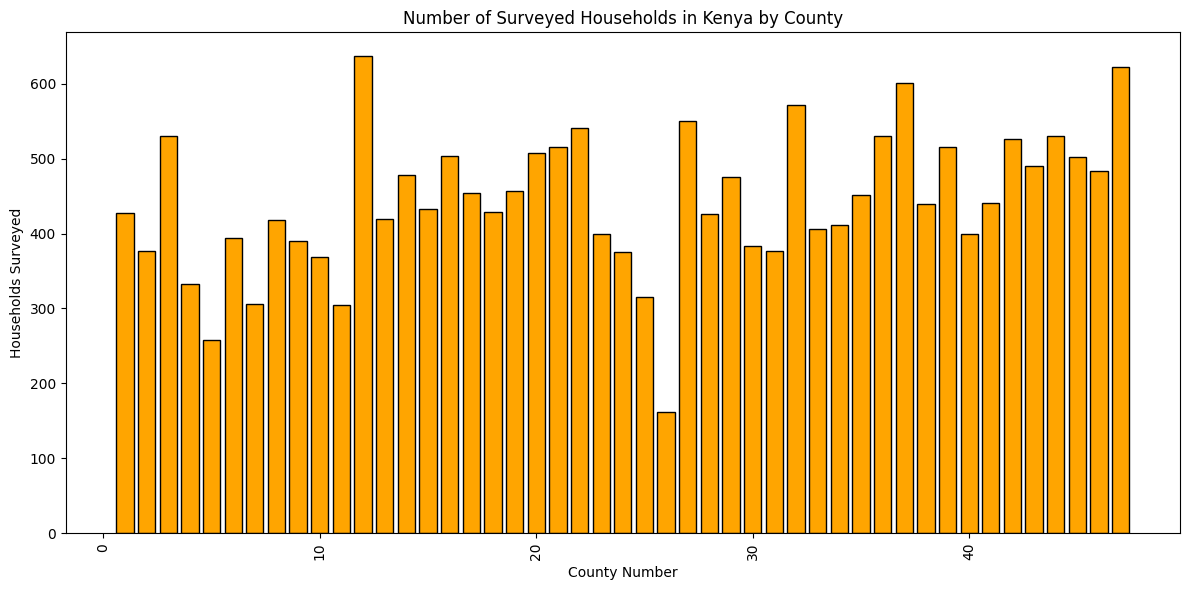

In [117]:
# Count households represented by county in FinAccess Household Survey 
county_counts = finaccess['county'].value_counts().sort_index()
all_counties = pd.Series(0, index=range(1, 48))  # Kenya has 47 counties
county_counts = all_counties.add(county_counts, fill_value=0)

# Convert Series to DataFrame
county_counts = county_counts.rename_axis('county_code').reset_index(name='household_count')

plt.figure(figsize=(12, 6))
plt.bar(county_counts['county_code'], county_counts['household_count'], color='orange', edgecolor='black')

plt.xlabel('County Number')
plt.ylabel('Households Surveyed')
plt.title('Number of Surveyed Households in Kenya by County')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

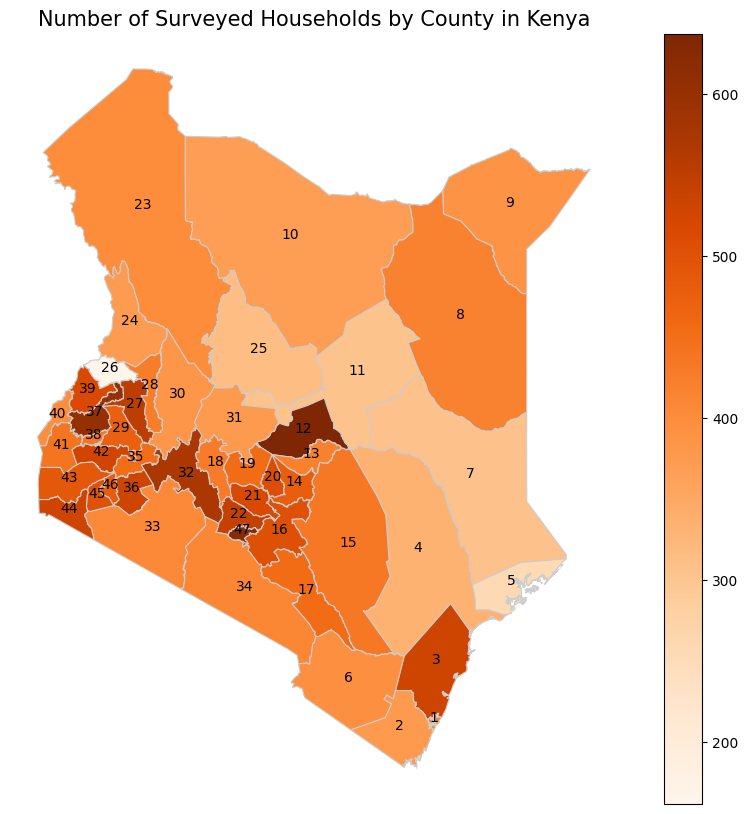

In [118]:
# Path to your shapefile (replace with the correct file path)
shapefile_path = '/kaggle/input/kenya-counties/Ken_Counties/County.shp'

# Read the shapefile into a GeoDataFrame
county_map = gpd.read_file(shapefile_path)

# Change data type of COUNTY_ID to integer
county_map['COUNTY_ID'] = county_map['COUNTY_ID'].astype(int)

# Merge on COUNTY_ID
kenya_map = county_map.merge(county_counts, how='left', left_on='COUNTY_ID', right_on='county_code')

# Plot the map
fig, ax = plt.subplots(figsize=(12, 10))
kenya_map.plot(column='household_count', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county numbers to the map
for idx, row in kenya_map.iterrows():
    # Get the centroid of each county
    x, y = row['geometry'].centroid.coords[0]
    ax.text(x, y, str(row['COUNTY_ID']), fontsize=10, ha='center', color='black')

# Add title and remove axis
ax.set_title('Number of Surveyed Households by County in Kenya', fontdict={'fontsize': 15})
ax.axis('off')

# Show the plot
plt.show()

All of Kenya’s 47 counties are represented in the survey.

We plot a histogram showing the age distribution of respondents.

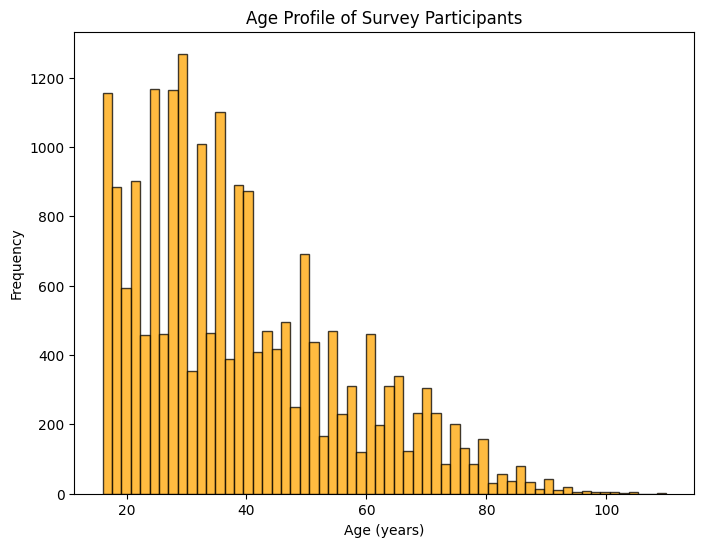

In [119]:
# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(subset_finaccess['A14i'], bins=60, alpha=0.75, color='orange', edgecolor='black')

# Add labels and title
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.title('Age Profile of Survey Participants')

# Display the plot
plt.show()

In [120]:
# Check if any survey participants are aged 15 or below
(subset_finaccess['A14i']<15).sum()

0

In [121]:
# Get summary statistics for the age of survey participants
(subset_finaccess['A14i']).describe()

count    20826.000000
mean        39.185201
std         17.228323
min         16.000000
25%         26.000000
50%         35.000000
75%         50.000000
max        110.000000
Name: A14i, dtype: float64

We observe that all participants are aged 16 and above. For the purposes of this study, we define adults as individuals aged 15 and over. Therefore, all participants (and all data points) in this study refer to adults.

We create a second subset of adults within the working-age range (15 to 64 years).

In [122]:
# Create second subset, filtering for adults aged 15 to 64
subset_finaccess_working_age = subset_finaccess[(subset_finaccess['A14i'] < 65)].copy()


We create a third subset of adults within the working-age range (15 to 64 years) that are engaged in work.

In [123]:
# Create third subset, filtering for adults engaged in work
subset_finaccess_workers = subset_finaccess_working_age[subset_finaccess_working_age[['B3A__1', 'B3A__2', 'B3A__3', 'B3A__4']].eq(1).any(axis=1)
].copy()

We create new binary indicator variables to summarise key behaviours by county. These include whether a respondent has any form of savings, has borrowed or used credit, uses digital financial services, sends or receives remittances, owns a mobile phone, or is unemployed.

In [124]:
# Create binary flags (1) if any specified variables equal 1
subset_finaccess['C1_account']           = subset_finaccess[['C1_10', 'C1_11', 'C1_12']].eq(1).any(axis=1).astype(int)
subset_finaccess['C1_savings']           = subset_finaccess[['C1_1a', 'C1_1b', 'C1_2', 'C1_3', 'C1_4', 'C1_5', 'C1_6', 'C1_7', 'C1_8', 'C1_9']].eq(1).any(axis=1).astype(int)
subset_finaccess['C1_borrowing']         = subset_finaccess[['C1_13a', 'C1_13b', 'C1_13c', 'C1_14', 'C1_15', 'C1_16', 'C1_17', 'C1_18', 'C1_19', 'C1_20', 'C1_21', 'C1_22', 'C1_23', 'C1_24', 'C1_25', 'C1_26', 'C1_27', 'C1_28', 'C1_29', 'C1_30', 'C1_31']].eq(1).any(axis=1).astype(int)
subset_finaccess['C1_credit']            = subset_finaccess[['C1_13a', 'C1_13b', 'C1_13c', 'C1_14']].eq(1).any(axis=1).astype(int)
subset_finaccess['H10_digital']          = subset_finaccess[['H10i__3', 'H10i__4', 'H10i__7']].eq(1).any(axis=1).astype(int)
subset_finaccess_workers['B3A_informal'] = subset_finaccess_workers[['B3A__1', 'B3A__3', 'B3A__4']].eq(1).any(axis=1).astype(int)
subset_finaccess['C1_social']            = subset_finaccess[['C1_40', 'C1_41', 'C1_42', 'B3A__5']].eq(1).any(axis=1).astype(int)

# Create binary flags (1/0) if specified variable is 1 or 2
subset_finaccess['S1_mobile']            = subset_finaccess['S1'].isin([1, 2]).astype(int)

# Create binary flags (1/0) if specified variable is 1, 2 or 3
subset_finaccess['B3Bi_remittance']      = subset_finaccess['B3Bi'].isin([1, 2, 3]).astype(int)

# Create binary flags (1) if all specified variables equal 0
subset_finaccess_working_age['B3A_unemployment']  = subset_finaccess_working_age[['B3A__1', 'B3A__2', 'B3A__3', 'B3A__4']].eq(0).all(axis=1).astype(int)


We create summary tables showing financial inclusion and socioeconomic indicators by county. The table below aggregates key variables for all adults in the survey, expressing most values as percentages.

In [125]:
# Group by 'county' and aggregate the data for all adults
summary_subset_finaccess_all_adults = subset_finaccess.groupby('county').agg(
    account_ownership               = ('C1_account', lambda x: x.mean() * 100),
    mobile_money_usage              = ('C1_10', lambda x: (x == 1).mean() * 100),
    savings_behaviour               = ('C1_savings', lambda x: x.mean() * 100),
    borrowing_behaviour             = ('C1_borrowing', lambda x: x.mean() * 100),
    credit_access                   = ('C1_credit', lambda x: x.mean() * 100),
    digital_payment_adoption        = ('H10_digital', lambda x: x.mean() * 100),
    remittances_received            = ('B3Bi_remittance', lambda x: x.mean() * 100),
    monthly_household_income        = ('B3Ii', 'mean'),
    social_protection_coverage      = ('C1_social', lambda x: x.mean() * 100),
    mobile_phone_ownership          = ('S1_mobile', lambda x: x.mean() * 100),
    internet_access                 = ('S2__1', lambda x: (x == 1).mean() * 100),
    distance_to_nearest_bank        = ('T3', 'mean'),
    urban_population                = ('A08', lambda x: (x == 2).mean() * 100),
    land_ownership                  = ('F1__1', lambda x: (x == 1).mean() * 100)
).reset_index()

We create a table summarising the unemployment rate among working-age adults (15–64 years) by county.

In [126]:
# Group by 'county' and aggregate the data for working age adults
summary_subset_finaccess_working_age = subset_finaccess_working_age.groupby('county').agg(
    unemployment_rate               = ('B3A_unemployment', lambda x: x.mean() * 100),
).reset_index()

We create a table summarising the percentage of workers in informal employment by county.

In [127]:
# Group by 'county' and aggregate the data for workers
summary_subset_finaccess_workers = subset_finaccess_workers.groupby('county').agg(
    informal_employment = ('B3A_informal', lambda x: x.mean() * 100),
).reset_index()

We merge the three summary tables (for all adults, working-age adults, and workers) into one consolidated dataset.

In [128]:
# Merge summary tables by county for all adults, working-age adults, and workers
finaccess_merged_summary = summary_subset_finaccess_all_adults.merge(
    summary_subset_finaccess_working_age,
    on='county'
).merge(
    summary_subset_finaccess_workers,
    on='county',
)

# Output merged summary to CSV
finaccess_merged_summary.to_csv('finaccess_merged_summary.csv')

# Display first few rows of merged summary
finaccess_merged_summary.head()

,county,account_ownership,mobile_money_usage,savings_behaviour,borrowing_behaviour,credit_access,digital_payment_adoption,remittances_received,monthly_household_income,social_protection_coverage,mobile_phone_ownership,internet_access,distance_to_nearest_bank,urban_population,land_ownership,unemployment_rate,informal_employment
0,1,81.411765,80.235294,52.470588,61.176471,3.058824,13.411765,35.529412,12801.217617,9.882353,90.823529,67.058824,1.237647,100.000000,13.411765,18.689320,86.865672
1,2,82.037534,80.965147,68.364611,57.104558,4.021448,12.064343,35.120643,10193.072289,11.796247,83.914209,45.308311,2.563003,30.831099,16.890080,18.584071,89.492754
2,3,73.584906,72.830189,55.471698,57.735849,3.018868,7.735849,43.207547,10282.323232,9.245283,81.509434,43.584906,1.728302,42.641509,9.245283,27.348643,90.229885
3,4,70.270270,69.669670,18.918919,33.933934,2.102102,3.903904,57.357357,7583.555556,4.504505,74.174174,22.522523,2.978979,36.636637,7.507508,56.351792,83.582090
4,5,81.782946,81.782946,26.744186,29.069767,2.325581,10.077519,47.286822,8543.147208,5.426357,82.945736,44.961240,1.786822,36.434109,14.728682,42.259414,86.231884


## 3 Data Visualisation

### 3.1 Choropleth maps

We create choropleth maps to visualise key indicators of financial inclusion — such as bank account ownership, mobile money use, and access to credit — across Kenya’s 47 counties.

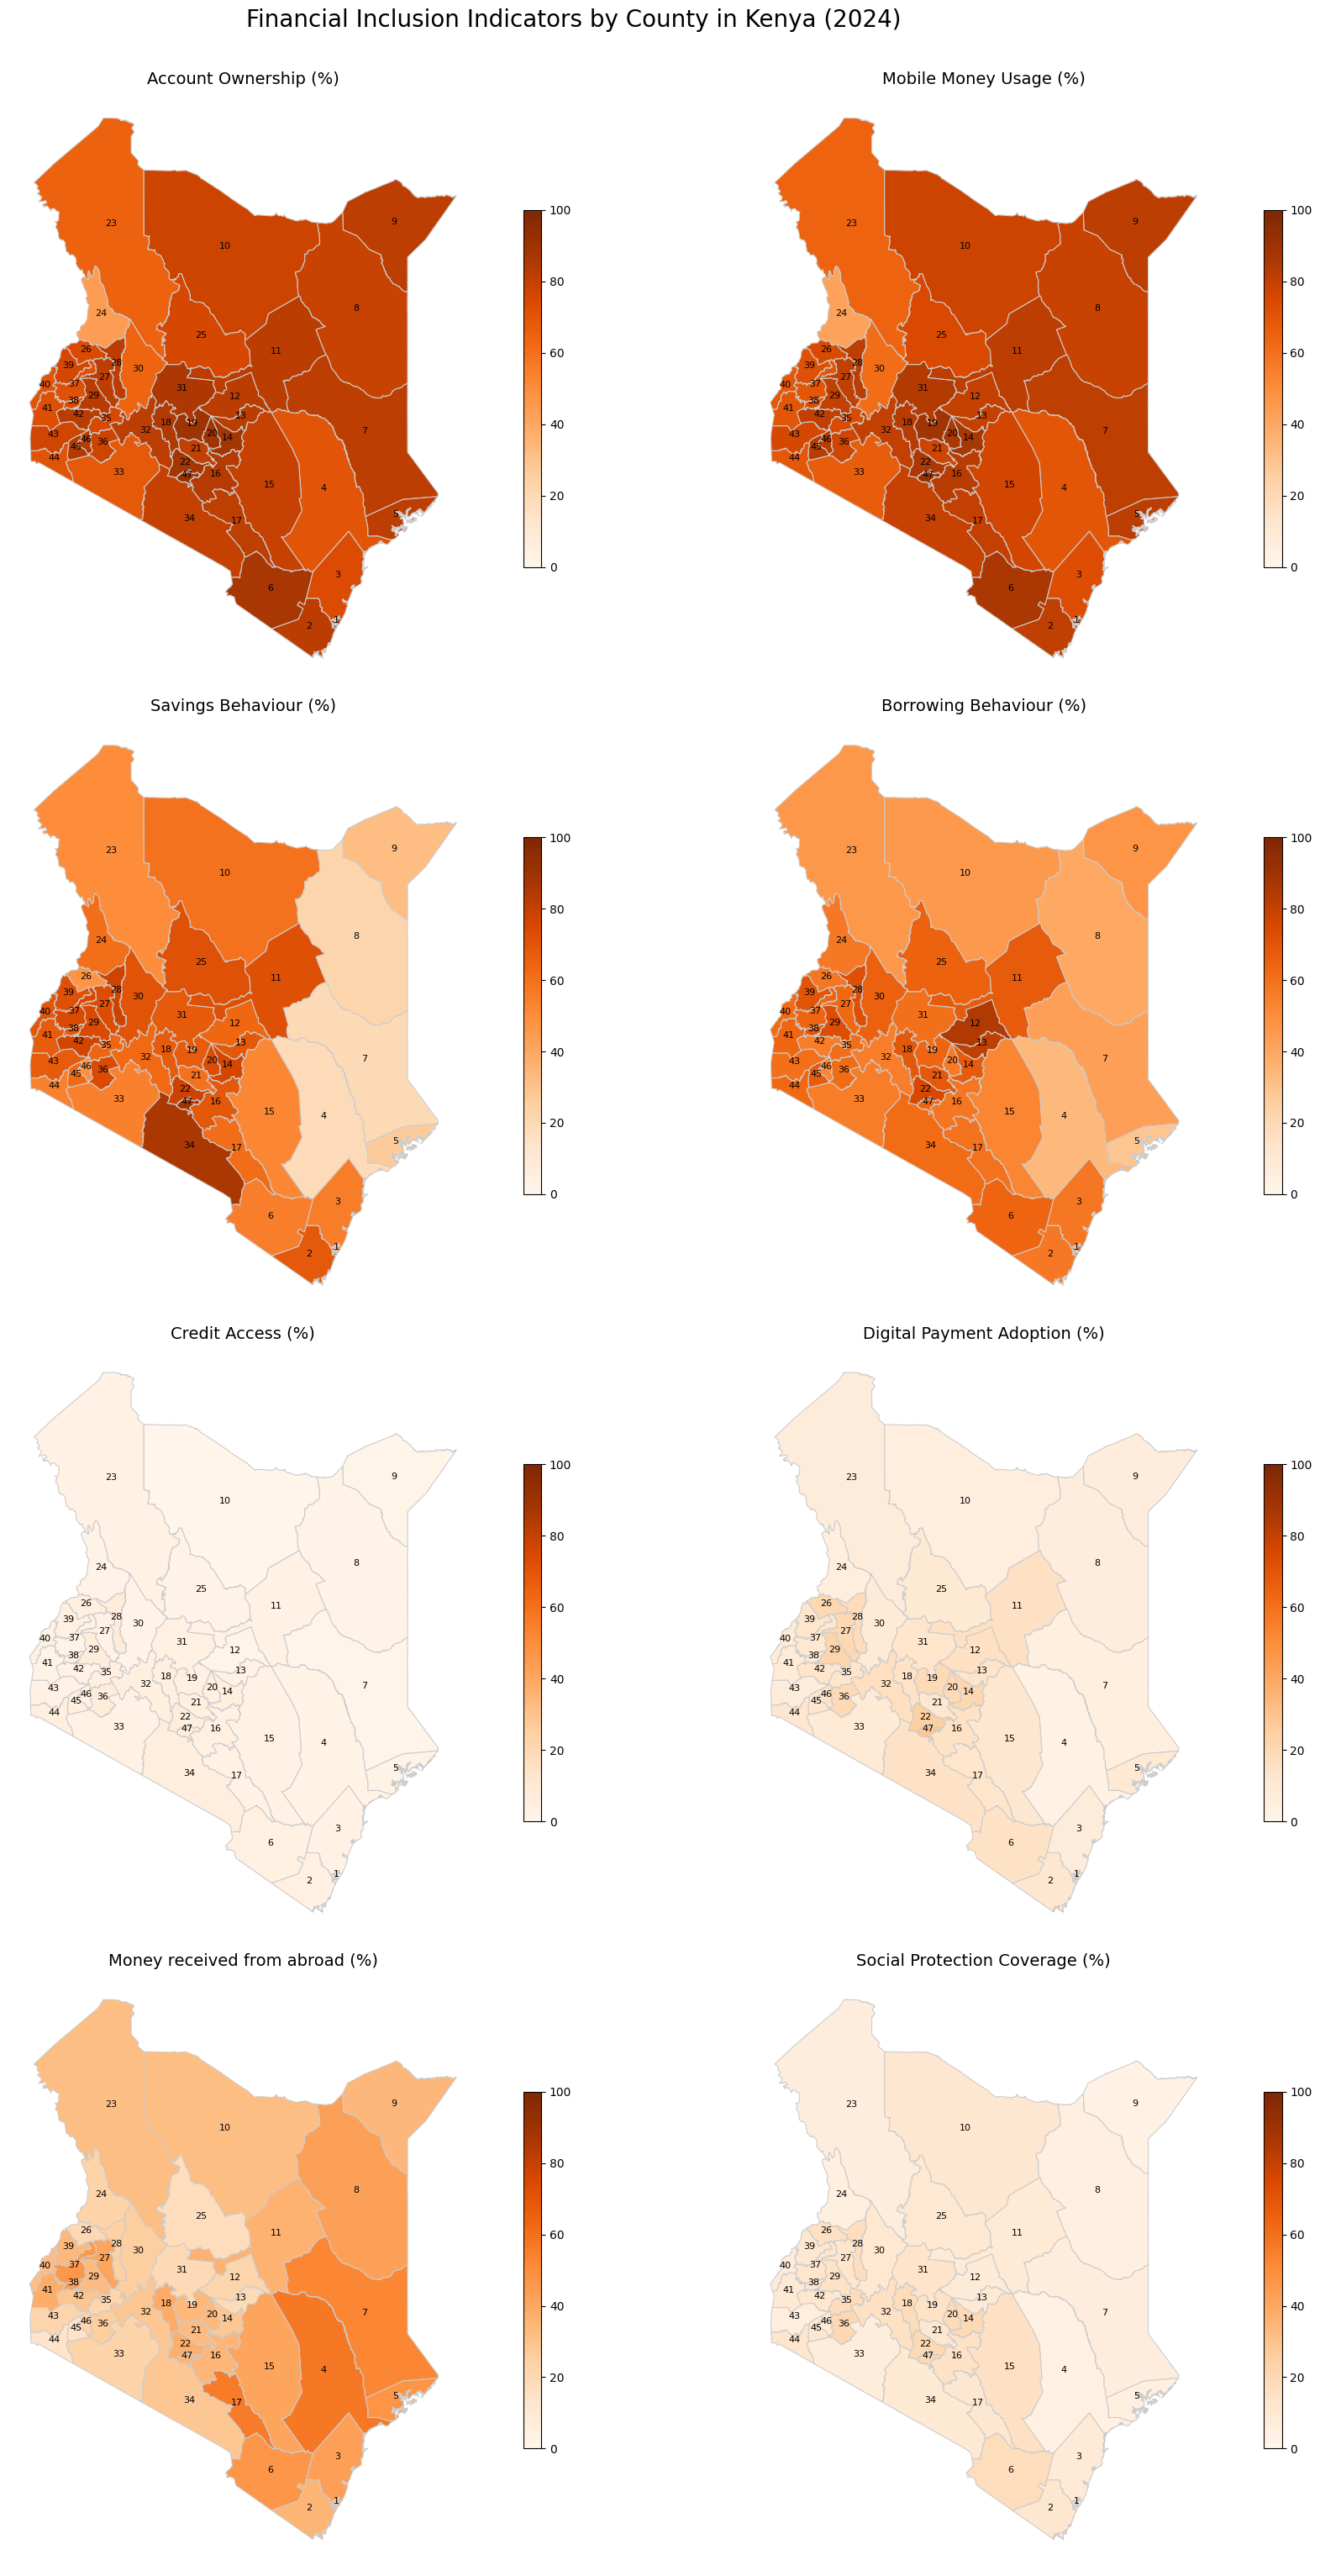

In [160]:
# Merge summary statistics with map data
kenya_map2 = county_map.merge(finaccess_merged_summary, how='left', left_on='COUNTY_ID', right_on='county')

# Set-up grid for maps
fig, axes = plt.subplots(4, 2, figsize=(20, 30))  # 4 rows, 2 columns

# Flatten axes for easy looping
axes = axes.flatten()

# List of columns to plot
columns_to_plot = ['account_ownership',
                   'mobile_money_usage',
                   'savings_behaviour',
                   'borrowing_behaviour',
                   'credit_access',
                   'digital_payment_adoption',
                   'remittances_received',
                   'social_protection_coverage']

titles = ['Account Ownership (%)',
          'Mobile Money Usage (%)',
          'Savings Behaviour (%)',
          'Borrowing Behaviour (%)',
          'Credit Access (%)',
          'Digital Payment Adoption (%)',
          'Money received from abroad (%)',
          'Social Protection Coverage (%)',]

for i, col in enumerate(columns_to_plot):
    kenya_map2.plot(
        column=col,
        cmap='Oranges',
        linewidth=0.8,
        ax=axes[i],
        edgecolor='0.8',
        vmin=0,
        vmax=100,
        legend=True,
        legend_kwds={'shrink': 0.6}
    )
    
    # Add county numbers
    for idx, row in kenya_map.iterrows():
        x, y = row['geometry'].centroid.coords[0]
        axes[i].text(x, y, str(row['COUNTY_ID']), fontsize=8, ha='center', color='black')

    # Style each subplot
    axes[i].set_title(titles[i], fontdict={'fontsize': 14})
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()

# Add overall title
plt.suptitle('Financial Inclusion Indicators by County in Kenya (2024)', fontsize=20, y=1.02)

# Save to file
plt.savefig("financial_inclusion_maps.png", dpi=300, bbox_inches='tight')

# Show plots
plt.show()

We observe that key indicators of financial inclusion demonstrate varying patterns across Kenya's counties. Bank account ownership (including mobile bank accounts) and mobile money usage are broadly evenly distributed and at relatively high levels.

In contrast, savings behavior and remittances received from abroad show considerable variation from county to county.

Credit access, digital payment adoption, and social protection coverage are generally low across the country.

Next, we create maps to visualise economic opportunity variables, such as mobile phone ownership, internet access, distance to the nearest bank.

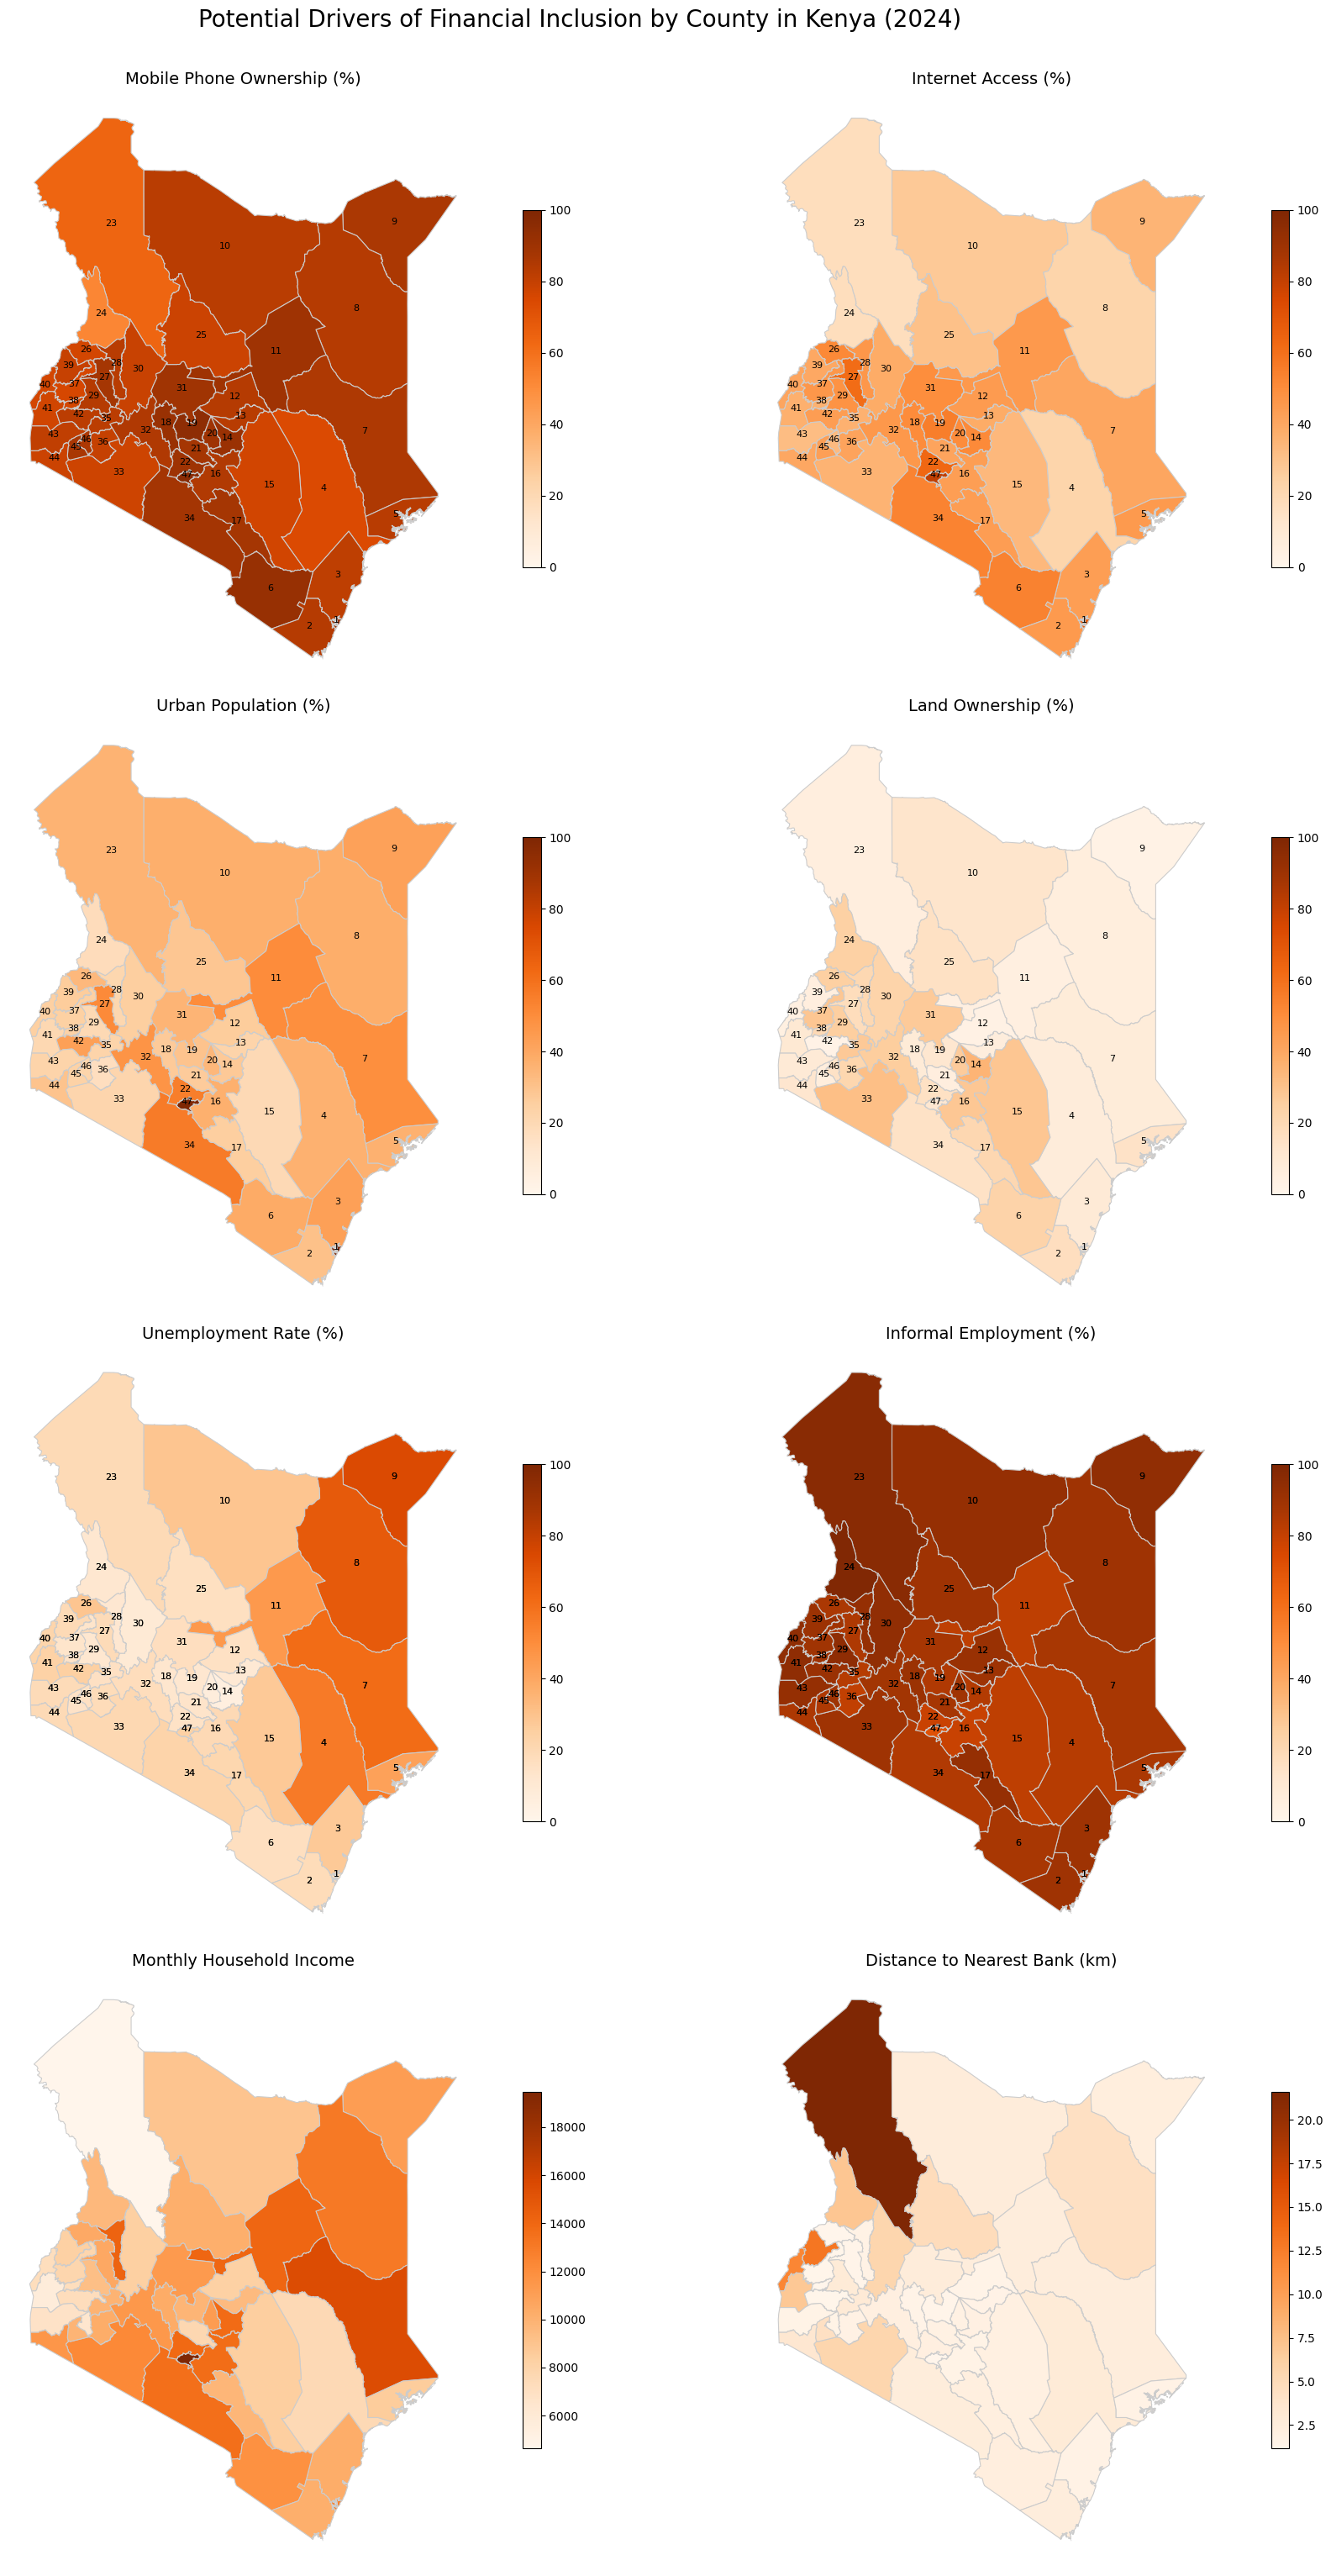

In [149]:
# Set-up grid for maps
fig, axes = plt.subplots(4, 2, figsize=(20, 30))  # 4 rows, 2 columns

# Plot % variables
# Flatten axes for easy looping
axes = axes.flatten()

# List of columns to plot
columns_to_plot = ['mobile_phone_ownership',
                   'internet_access',
                   'urban_population',
                   'land_ownership',
                   'unemployment_rate',
                   'informal_employment']

titles = ['Mobile Phone Ownership (%)',
          'Internet Access (%)',
          'Urban Population (%)',
          'Land Ownership (%)',
          'Unemployment Rate (%)',
          'Informal Employment (%)']

for i, col in enumerate(columns_to_plot):
    kenya_map2.plot(
        column=col,
        cmap='Oranges',
        linewidth=0.8,
        ax=axes[i],
        edgecolor='0.8',
        vmin=0,    # Minimum value for colour scale
        vmax=100,  # Maximum value for colour scale
        legend=True,
        legend_kwds={'shrink': 0.6}
    )
    
    # Add county numbers
    for idx, row in kenya_map.iterrows():
        x, y = row['geometry'].centroid.coords[0]
        axes[i].text(x, y, str(row['COUNTY_ID']), fontsize=8, ha='center', color='black')

    # Style each subplot
    axes[i].set_title(titles[i], fontdict={'fontsize': 14})
    axes[i].axis('off')

# Plot non-% variables
# List of additional columns to plot
columns_to_plot = ['monthly_household_income',
                   'distance_to_nearest_bank',]

titles = ['Monthly Household Income',
          'Distance to Nearest Bank (km)']

for i, col in enumerate(columns_to_plot):
    kenya_map2.plot(
        column=col,
        cmap='Oranges',
        linewidth=0.8,
        ax=axes[i+6],
        edgecolor='0.8',
        legend=True,
        legend_kwds={'shrink': 0.6}
    )
    
    # Add county numbers
    for idx, row in kenya_map.iterrows():
        x, y = row['geometry'].centroid.coords[0]
        axes[i+6].text(x, y, str(row['COUNTY_ID']), fontsize=8, ha='center', color='black')

    # Style each subplot
    axes[i+6].set_title(titles[i], fontdict={'fontsize': 14})
    axes[i+6].axis('off')

# Adjust layout
plt.tight_layout()

# Add overall title
plt.suptitle('Potential Drivers of Financial Inclusion by County in Kenya (2024)', fontsize=20, y=1.02)

# Save to file
plt.savefig("potential_finaccess_drivers_maps.png", dpi=300, bbox_inches='tight')

# Show plots
plt.show()

Unsurprisingly, monthly household income is highest in Kenya's capital, Nairobi (County 47), which also has the highest proportion of urban population. Mobile phone ownership is widespread across the country.

### 3.2 Scatterplots
We create scatterplots to explore potential correlations between key indicators of financial inclusion and economic opportunity variables.

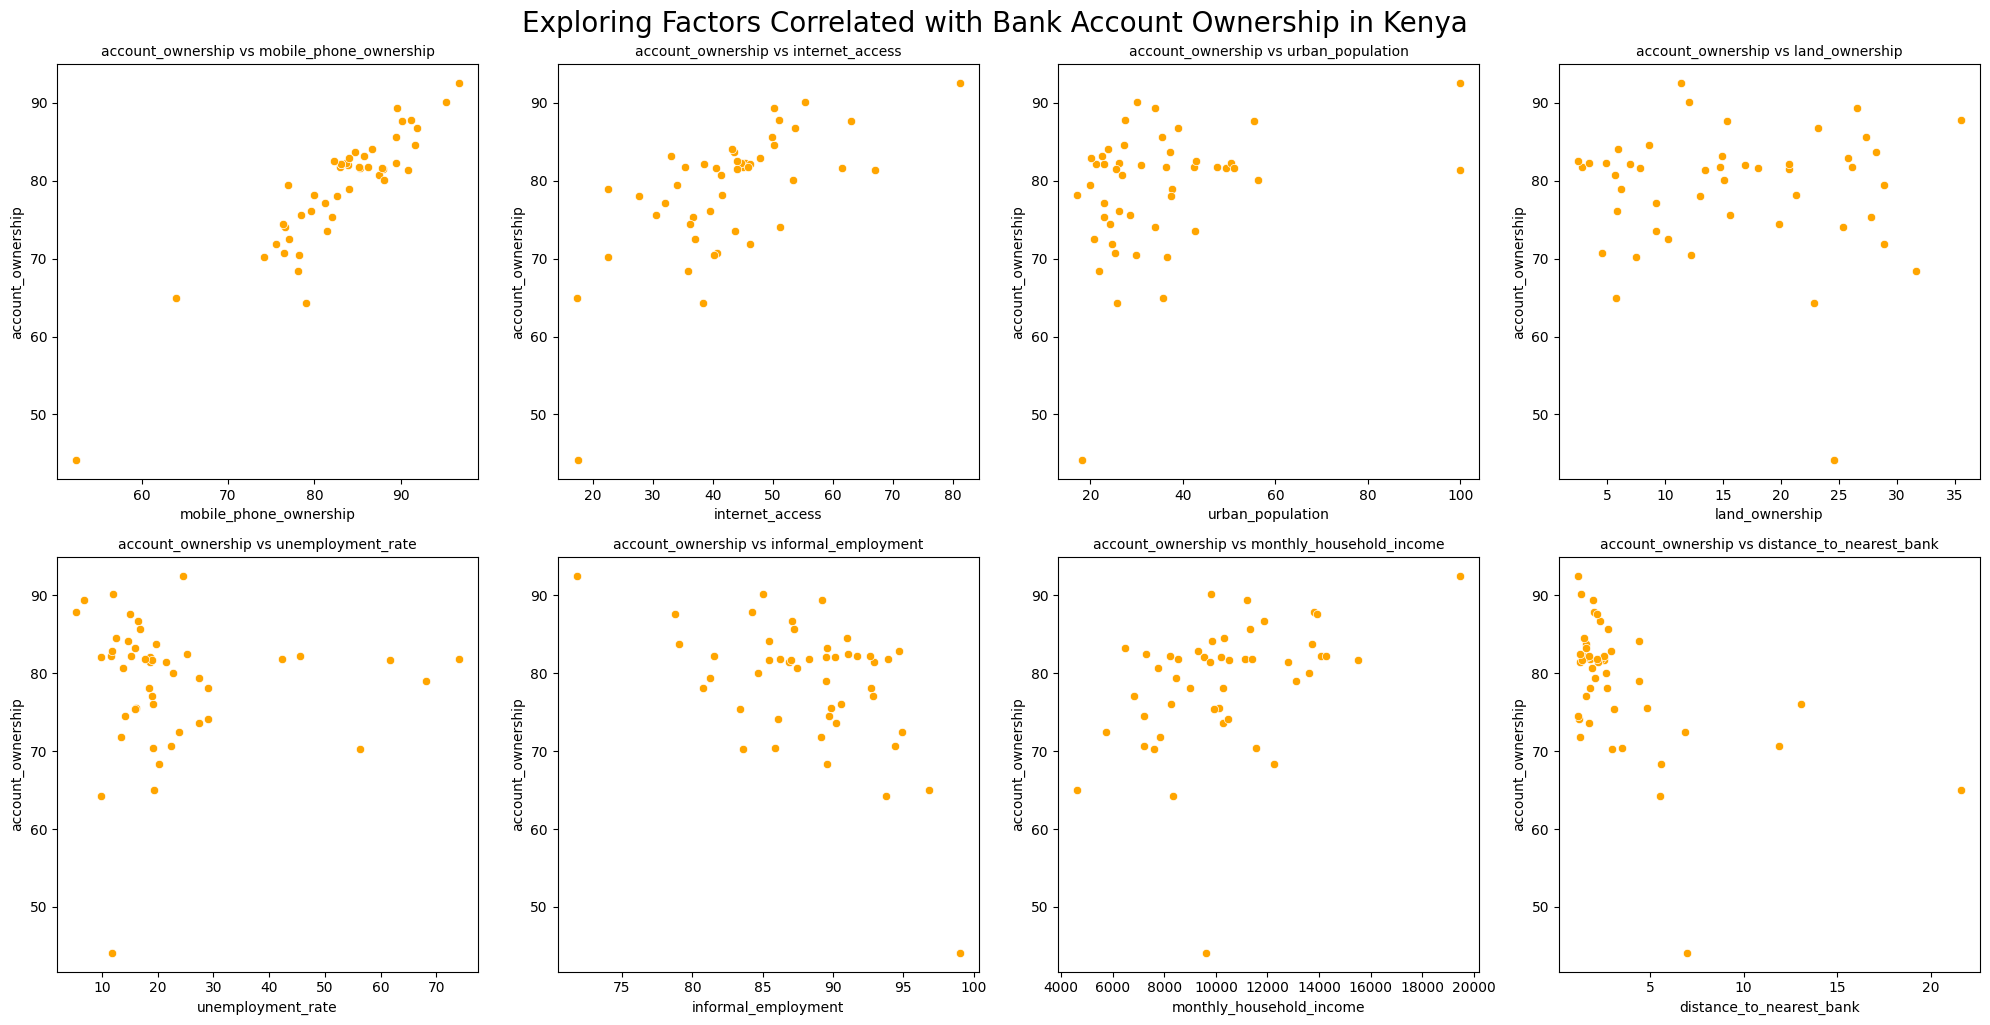

In [155]:
# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Define the variables
y_var = 'account_ownership'
x_vars = [
    'mobile_phone_ownership',
    'internet_access',
    'urban_population',
    'land_ownership',
    'unemployment_rate',
    'informal_employment',
    'monthly_household_income',
    'distance_to_nearest_bank'
]

# Set up figure with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Create scatterplots
for i, x_var in enumerate(x_vars):
    sns.scatterplot(
        data=finaccess_merged_summary,
        x=x_var,
        y=y_var,
        ax=axes[i],
        color='orange'
    )
    axes[i].set_title(f'{y_var} vs {x_var}', fontsize=10)

# Adjust layout
plt.tight_layout()

# Add overall title
plt.suptitle('Impact of Key Variables on Bank Account Ownership', fontsize=20, y=1.02)

# Show plot
plt.show()

There is a strong positive correlation between bank account ownership and mobile phone ownership across counties. This likely reflects the dominance of mobile money and mobile banking services in driving financial inclusion in Kenya, where registration with a mobile money provider typically qualifies as owning an account.

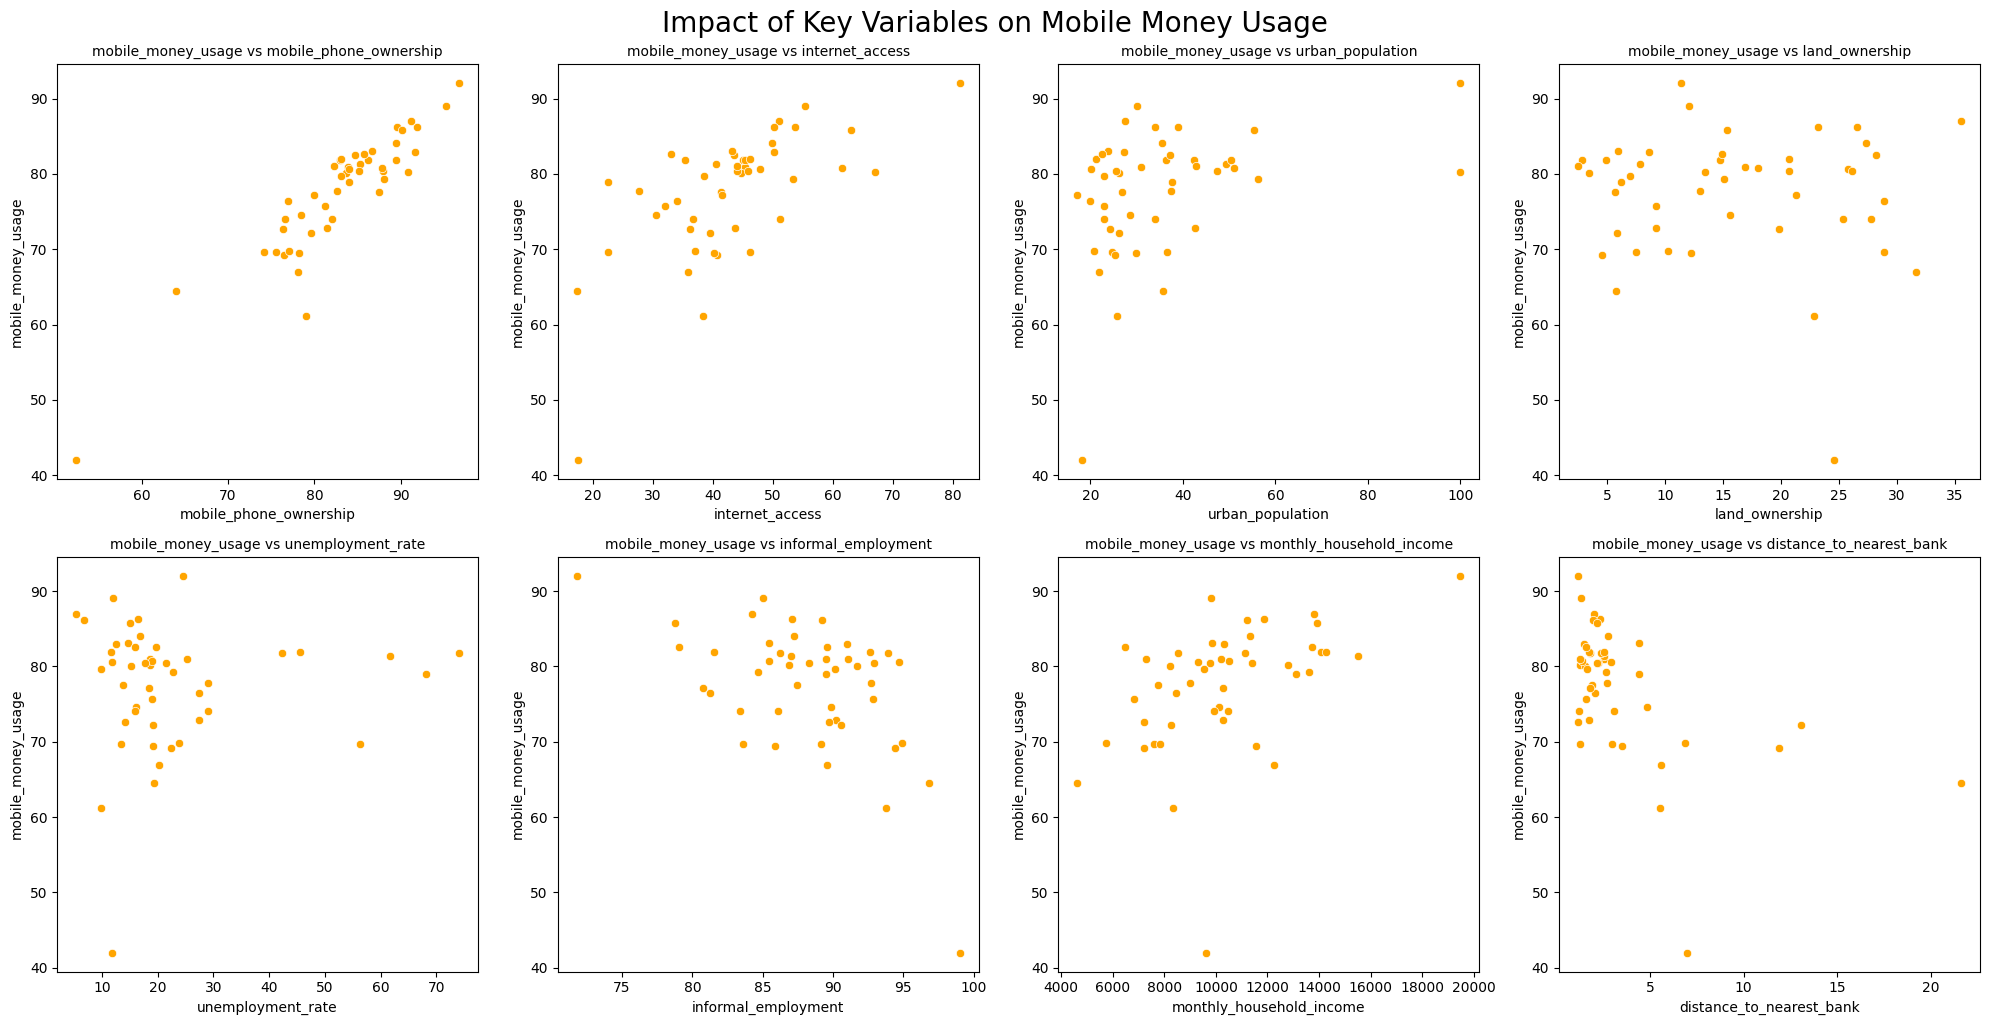

In [165]:
# Define y variable
y_var = 'mobile_money_usage'

# Set up figure with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Create scatterplots
for i, x_var in enumerate(x_vars):
    sns.scatterplot(
        data=finaccess_merged_summary,
        x=x_var,
        y=y_var,
        ax=axes[i],
        color='orange'
    )
    axes[i].set_title(f'{y_var} vs {x_var}', fontsize=10)

# Adjust layout
plt.tight_layout()

# Add overall title
plt.suptitle('Impact of Key Variables on Mobile Money Usage', fontsize=20, y=1.02)

# Show plot
plt.show()

Unsurprisingly, a similar positive correlation is observed between mobile money usage and mobile phone ownership. This further emphasizes the central role of mobile technology in enabling access to financial services, as mobile phones are the primary medium through which mobile money services are accessed.

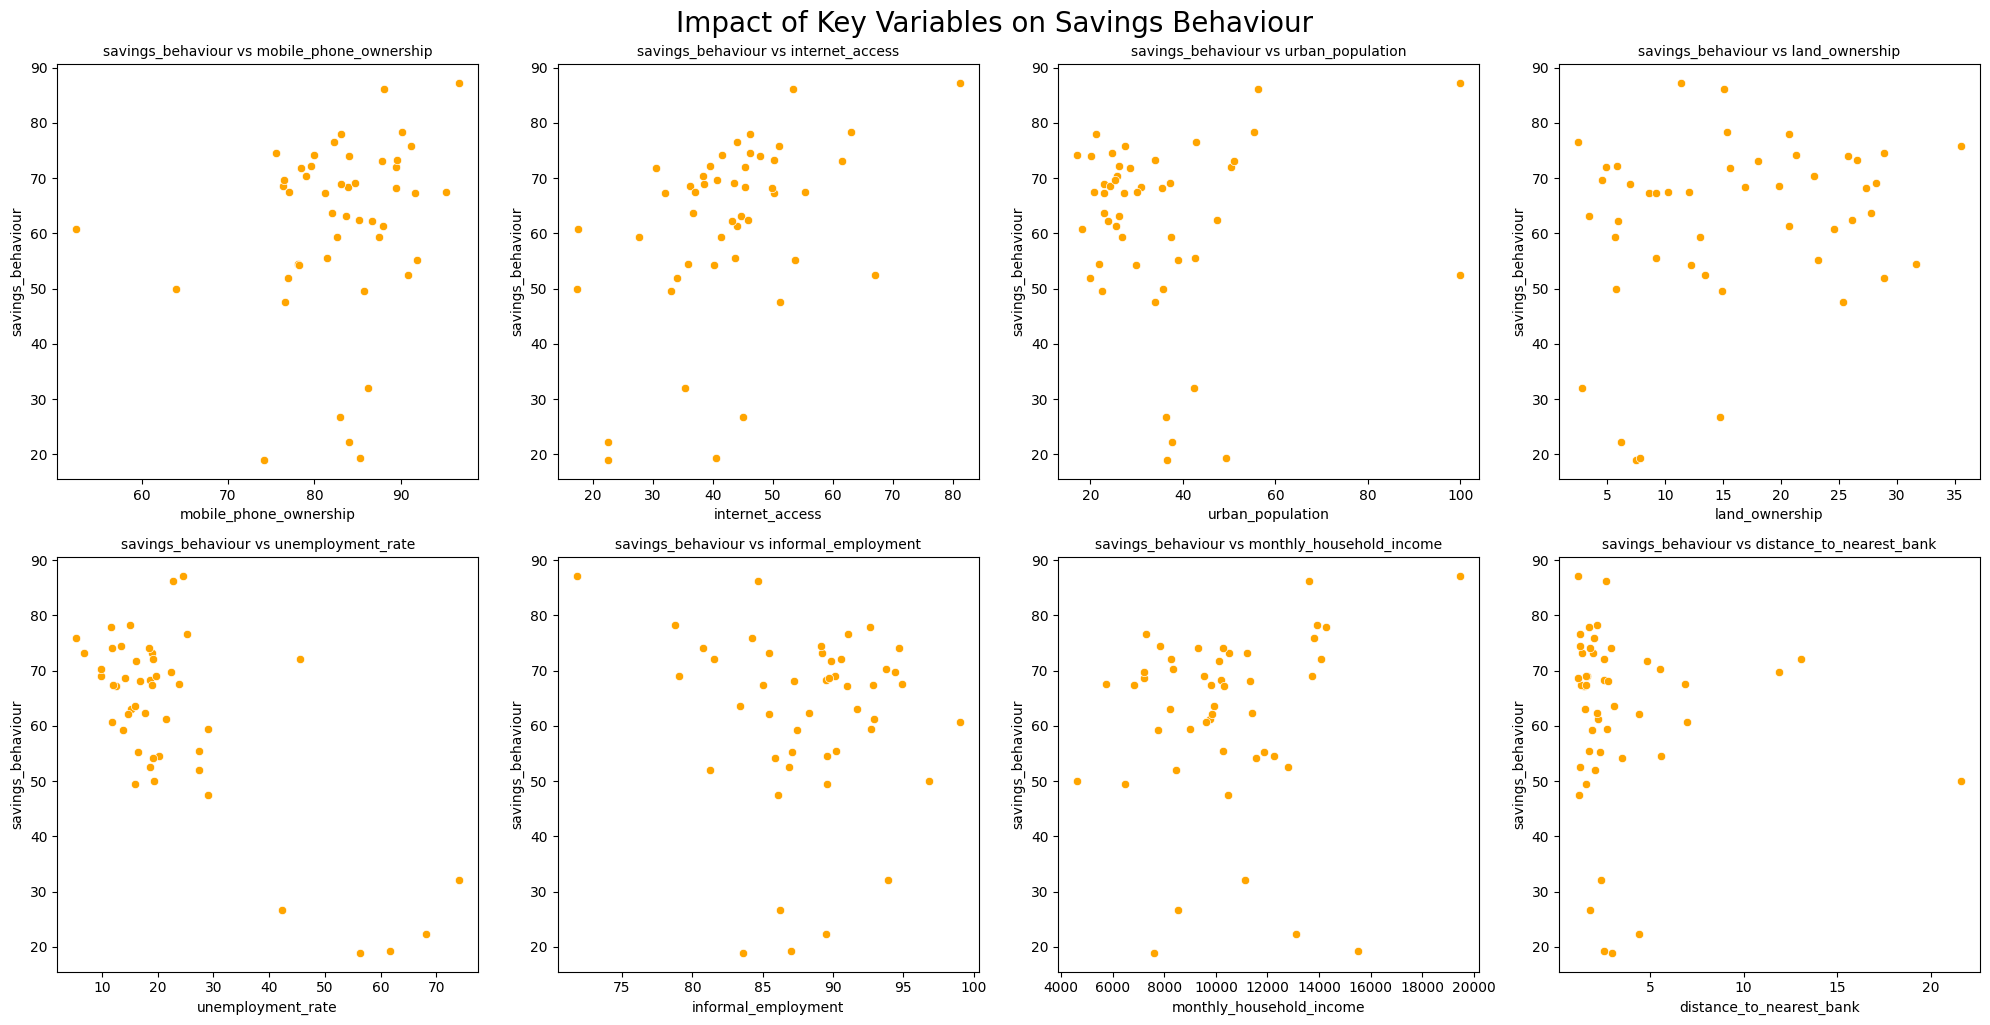

In [164]:
# Define y variable
y_var = 'savings_behaviour'

# Set up figure with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Create scatterplots
for i, x_var in enumerate(x_vars):
    sns.scatterplot(
        data=finaccess_merged_summary,
        x=x_var,
        y=y_var,
        ax=axes[i],
        color='orange'
    )
    axes[i].set_title(f'{y_var} vs {x_var}', fontsize=10)

# Adjust layout
plt.tight_layout()

# Add overall title
plt.suptitle('Impact of Key Variables on Savings Behaviour', fontsize=20, y=1.02)

# Show plot
plt.show()

A loose negative correlation is observed between saving behavior and the unemployment rate, with counties having lower unemployment generally showing higher rates of saving. This relationship may be driven by broader economic prosperity, where regions with more stable employment conditions and higher income levels are better positioned for individuals to save.

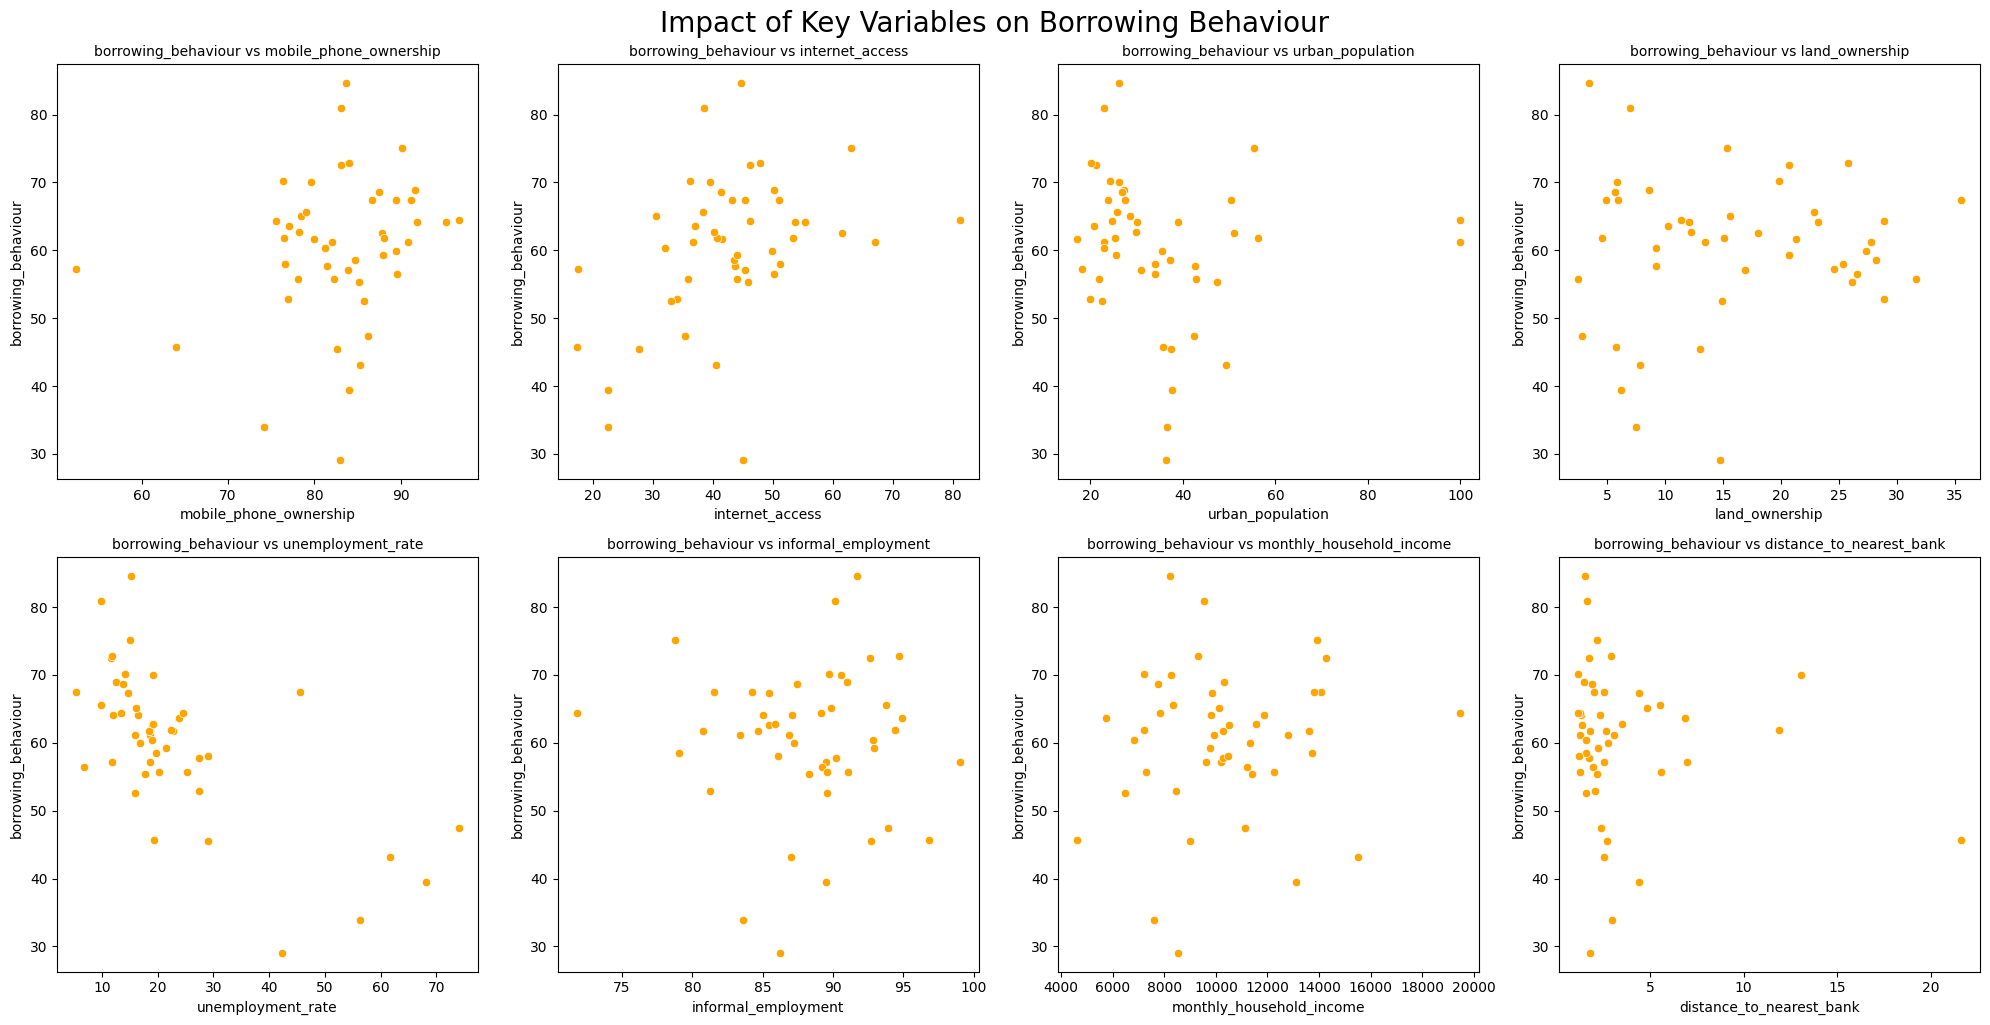

In [158]:
# Define y variable
y_var = 'borrowing_behaviour'

# Set up figure with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Create scatterplots
for i, x_var in enumerate(x_vars):
    sns.scatterplot(
        data=finaccess_merged_summary,
        x=x_var,
        y=y_var,
        ax=axes[i],
        color='orange'
    )
    axes[i].set_title(f'{y_var} vs {x_var}', fontsize=10)

# Adjust layout
plt.tight_layout()

# Add overall title
plt.suptitle('Impact of Key Variables on Borrowing Behaviour', fontsize=20, y=1.02)

# Show plot
plt.show()

A loose negative correlation is observed between borrowing behavior and the unemployment rate, with counties experiencing lower unemployment generally showing higher rates of borrowing. This suggests that financial access and employment may be interconnected, as regions with more stable employment opportunities tend to have individuals with better access to credit and financial services.

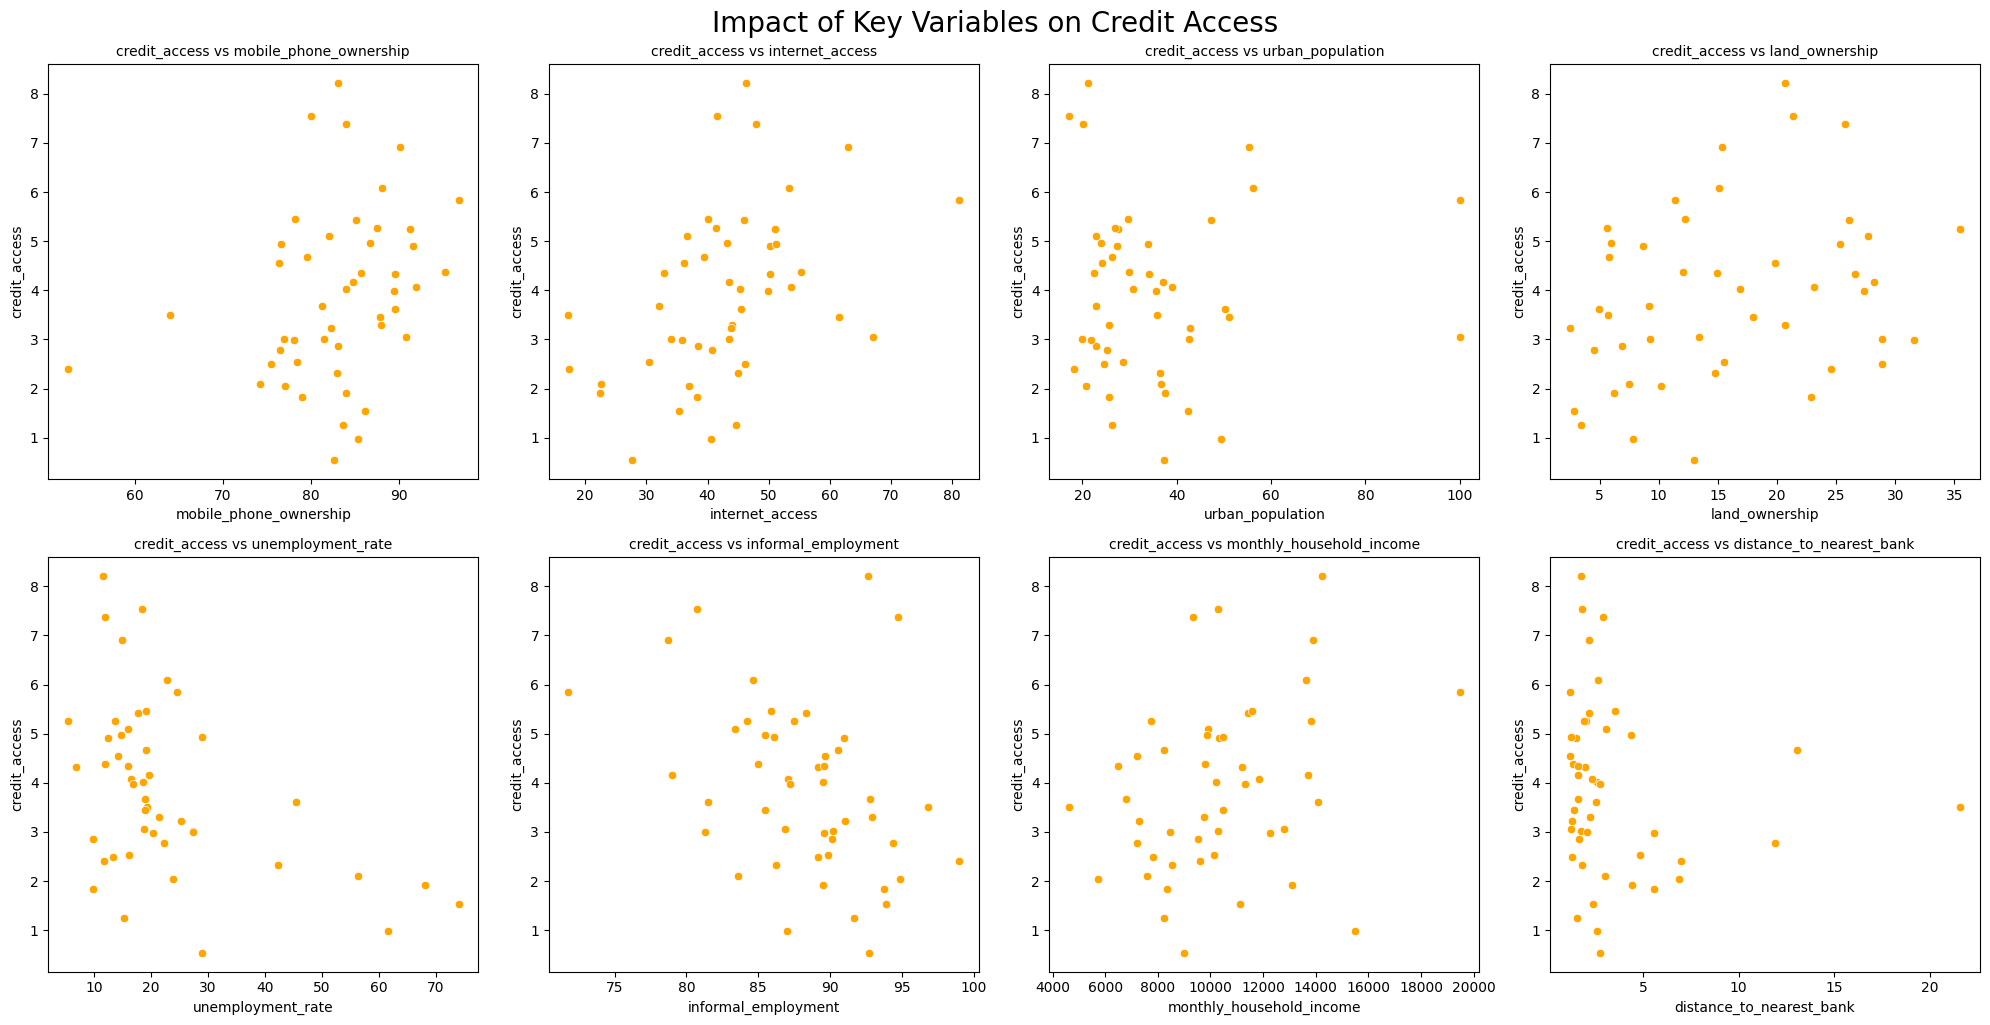

In [163]:
# Define y variable
y_var = 'credit_access'

# Set up figure with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Create scatterplots
for i, x_var in enumerate(x_vars):
    sns.scatterplot(
        data=finaccess_merged_summary,
        x=x_var,
        y=y_var,
        ax=axes[i],
        color='orange'
    )
    axes[i].set_title(f'{y_var} vs {x_var}', fontsize=10)

# Adjust layout
plt.tight_layout()

# Add overall title
plt.suptitle('Impact of Key Variables on Credit Access', fontsize=20, y=1.02)

# Show plot
plt.show()

No clear correlations are observed for credit access. It is important to note that the map in the previous section highlighted generally very low levels of credit access across all of Kenya, suggesting that limited access to credit may be a widespread issue, potentially overshadowing any correlation with other factors.

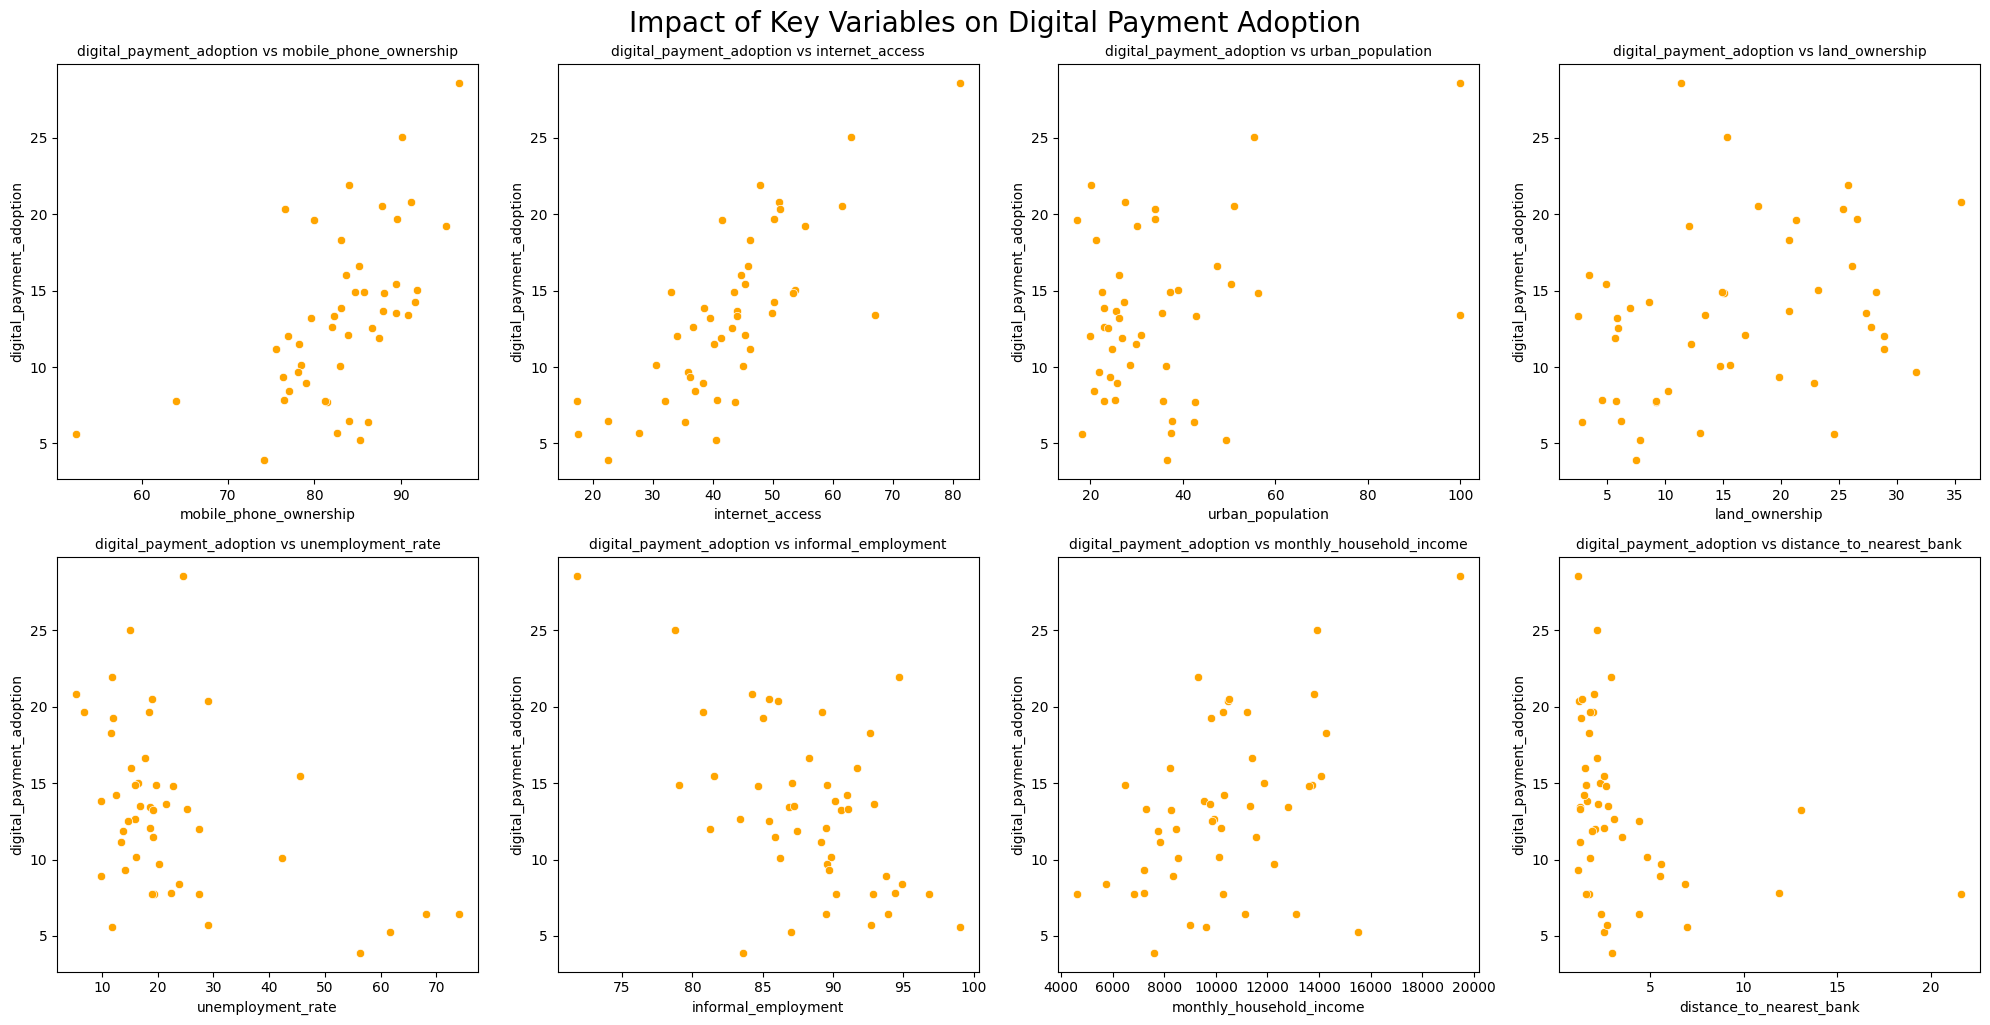

In [162]:
# Define y variable
y_var = 'digital_payment_adoption'

# Set up figure with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Create scatterplots
for i, x_var in enumerate(x_vars):
    sns.scatterplot(
        data=finaccess_merged_summary,
        x=x_var,
        y=y_var,
        ax=axes[i],
        color='orange'
    )
    axes[i].set_title(f'{y_var} vs {x_var}', fontsize=10)

# Adjust layout
plt.tight_layout()

# Add overall title
plt.suptitle('Impact of Key Variables on Digital Payment Adoption', fontsize=20, y=1.02)

# Show plot
plt.show()

We observe a clear correlation between digital payment adoption and internet access, as well as a weaker correlation with mobile phone ownership.

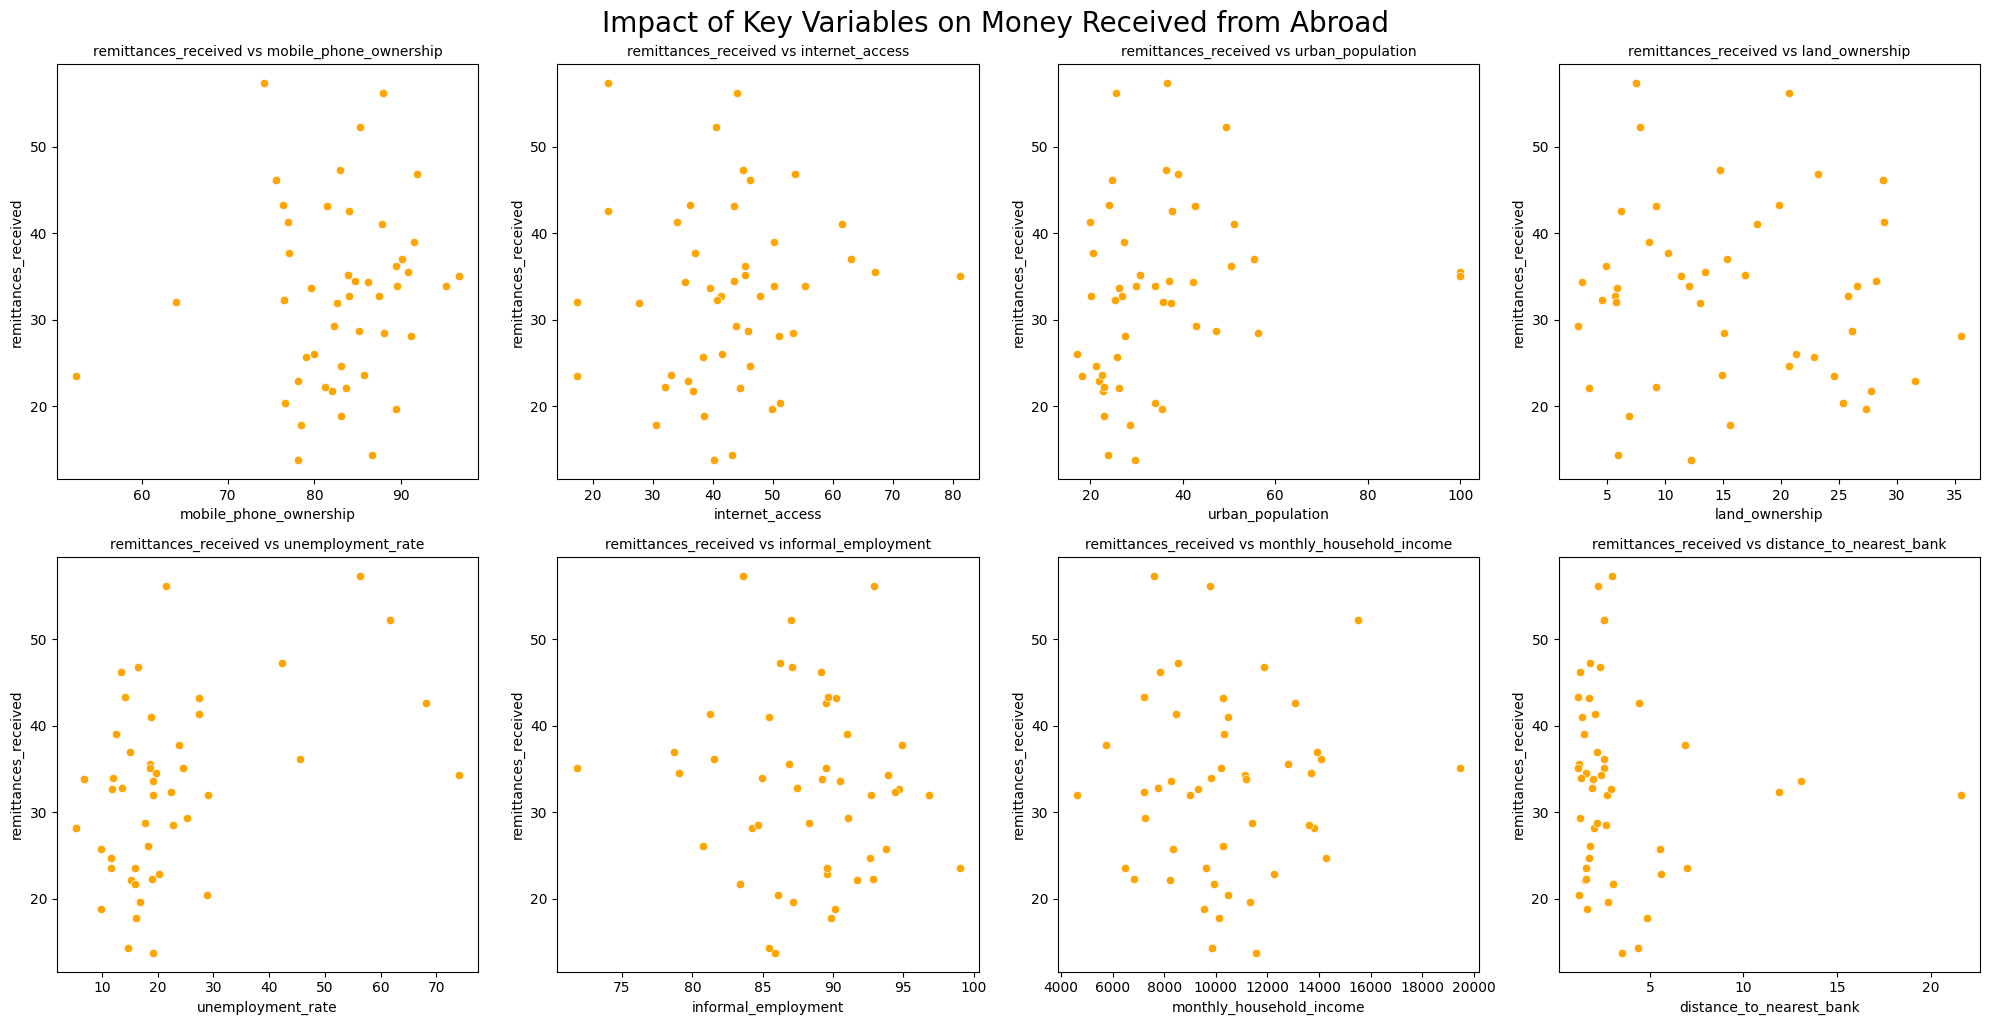

In [166]:
# Define y variable
y_var = 'remittances_received'

# Set up figure with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Create scatterplots
for i, x_var in enumerate(x_vars):
    sns.scatterplot(
        data=finaccess_merged_summary,
        x=x_var,
        y=y_var,
        ax=axes[i],
        color='orange'
    )
    axes[i].set_title(f'{y_var} vs {x_var}', fontsize=10)

# Adjust layout
plt.tight_layout()

# Add overall title
plt.suptitle('Impact of Key Variables on Money Received from Abroad', fontsize=20, y=1.02)

# Show plot
plt.show()

No clear correlation is observed between the percentage of adults receiving remittances from abroad and other variables.

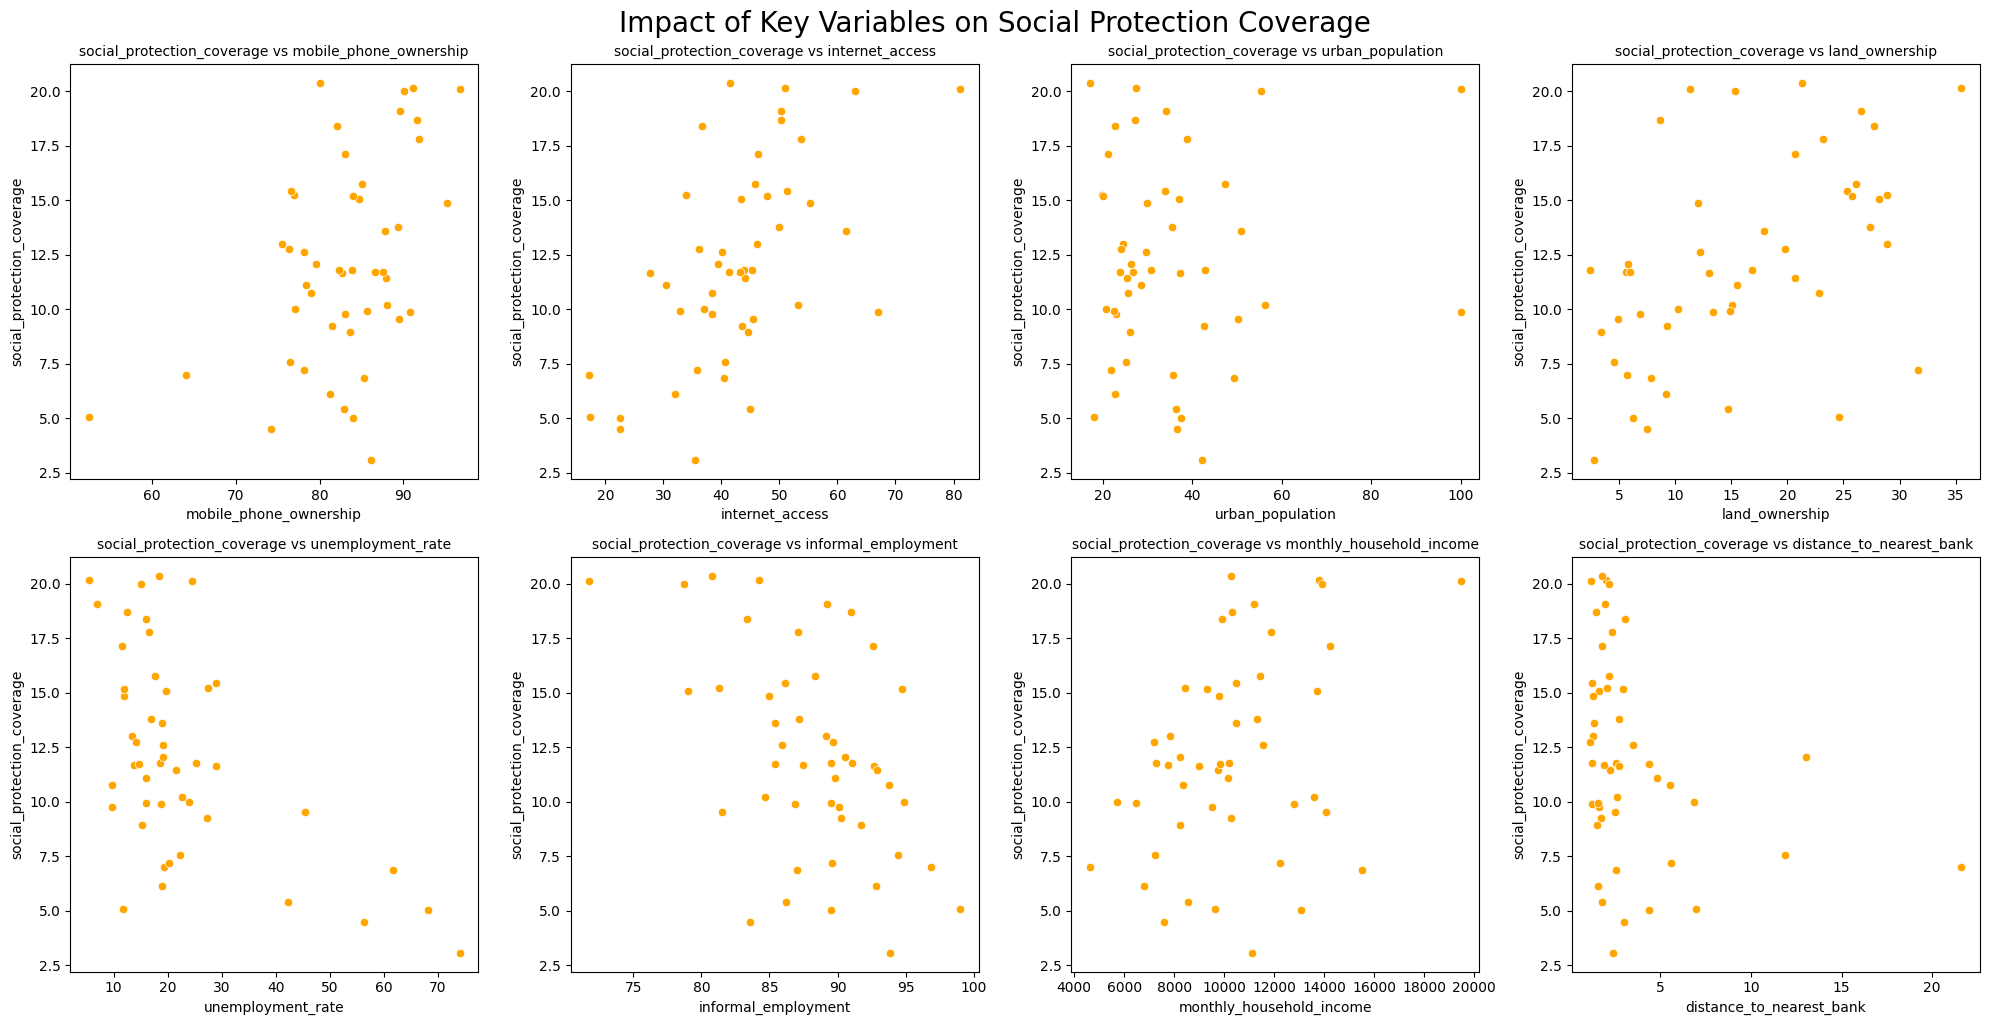

In [167]:
# Define y variable
y_var = 'social_protection_coverage'

# Set up figure with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Create scatterplots
for i, x_var in enumerate(x_vars):
    sns.scatterplot(
        data=finaccess_merged_summary,
        x=x_var,
        y=y_var,
        ax=axes[i],
        color='orange'
    )
    axes[i].set_title(f'{y_var} vs {x_var}', fontsize=10)

# Adjust layout
plt.tight_layout()

# Add overall title
plt.suptitle('Impact of Key Variables on Social Protection Coverage', fontsize=20, y=1.02)

# Show plot
plt.show()

No clear correlations are observed for social protection coverage. It is worth noting that the previous map highlighted generally low levels of credit access across all of Kenya, suggesting that limited access to credit may be a widespread issue that could overshadow any potential correlation with other factors.

Finally, we explore correlations between the indicators of financial inclusions themselves.

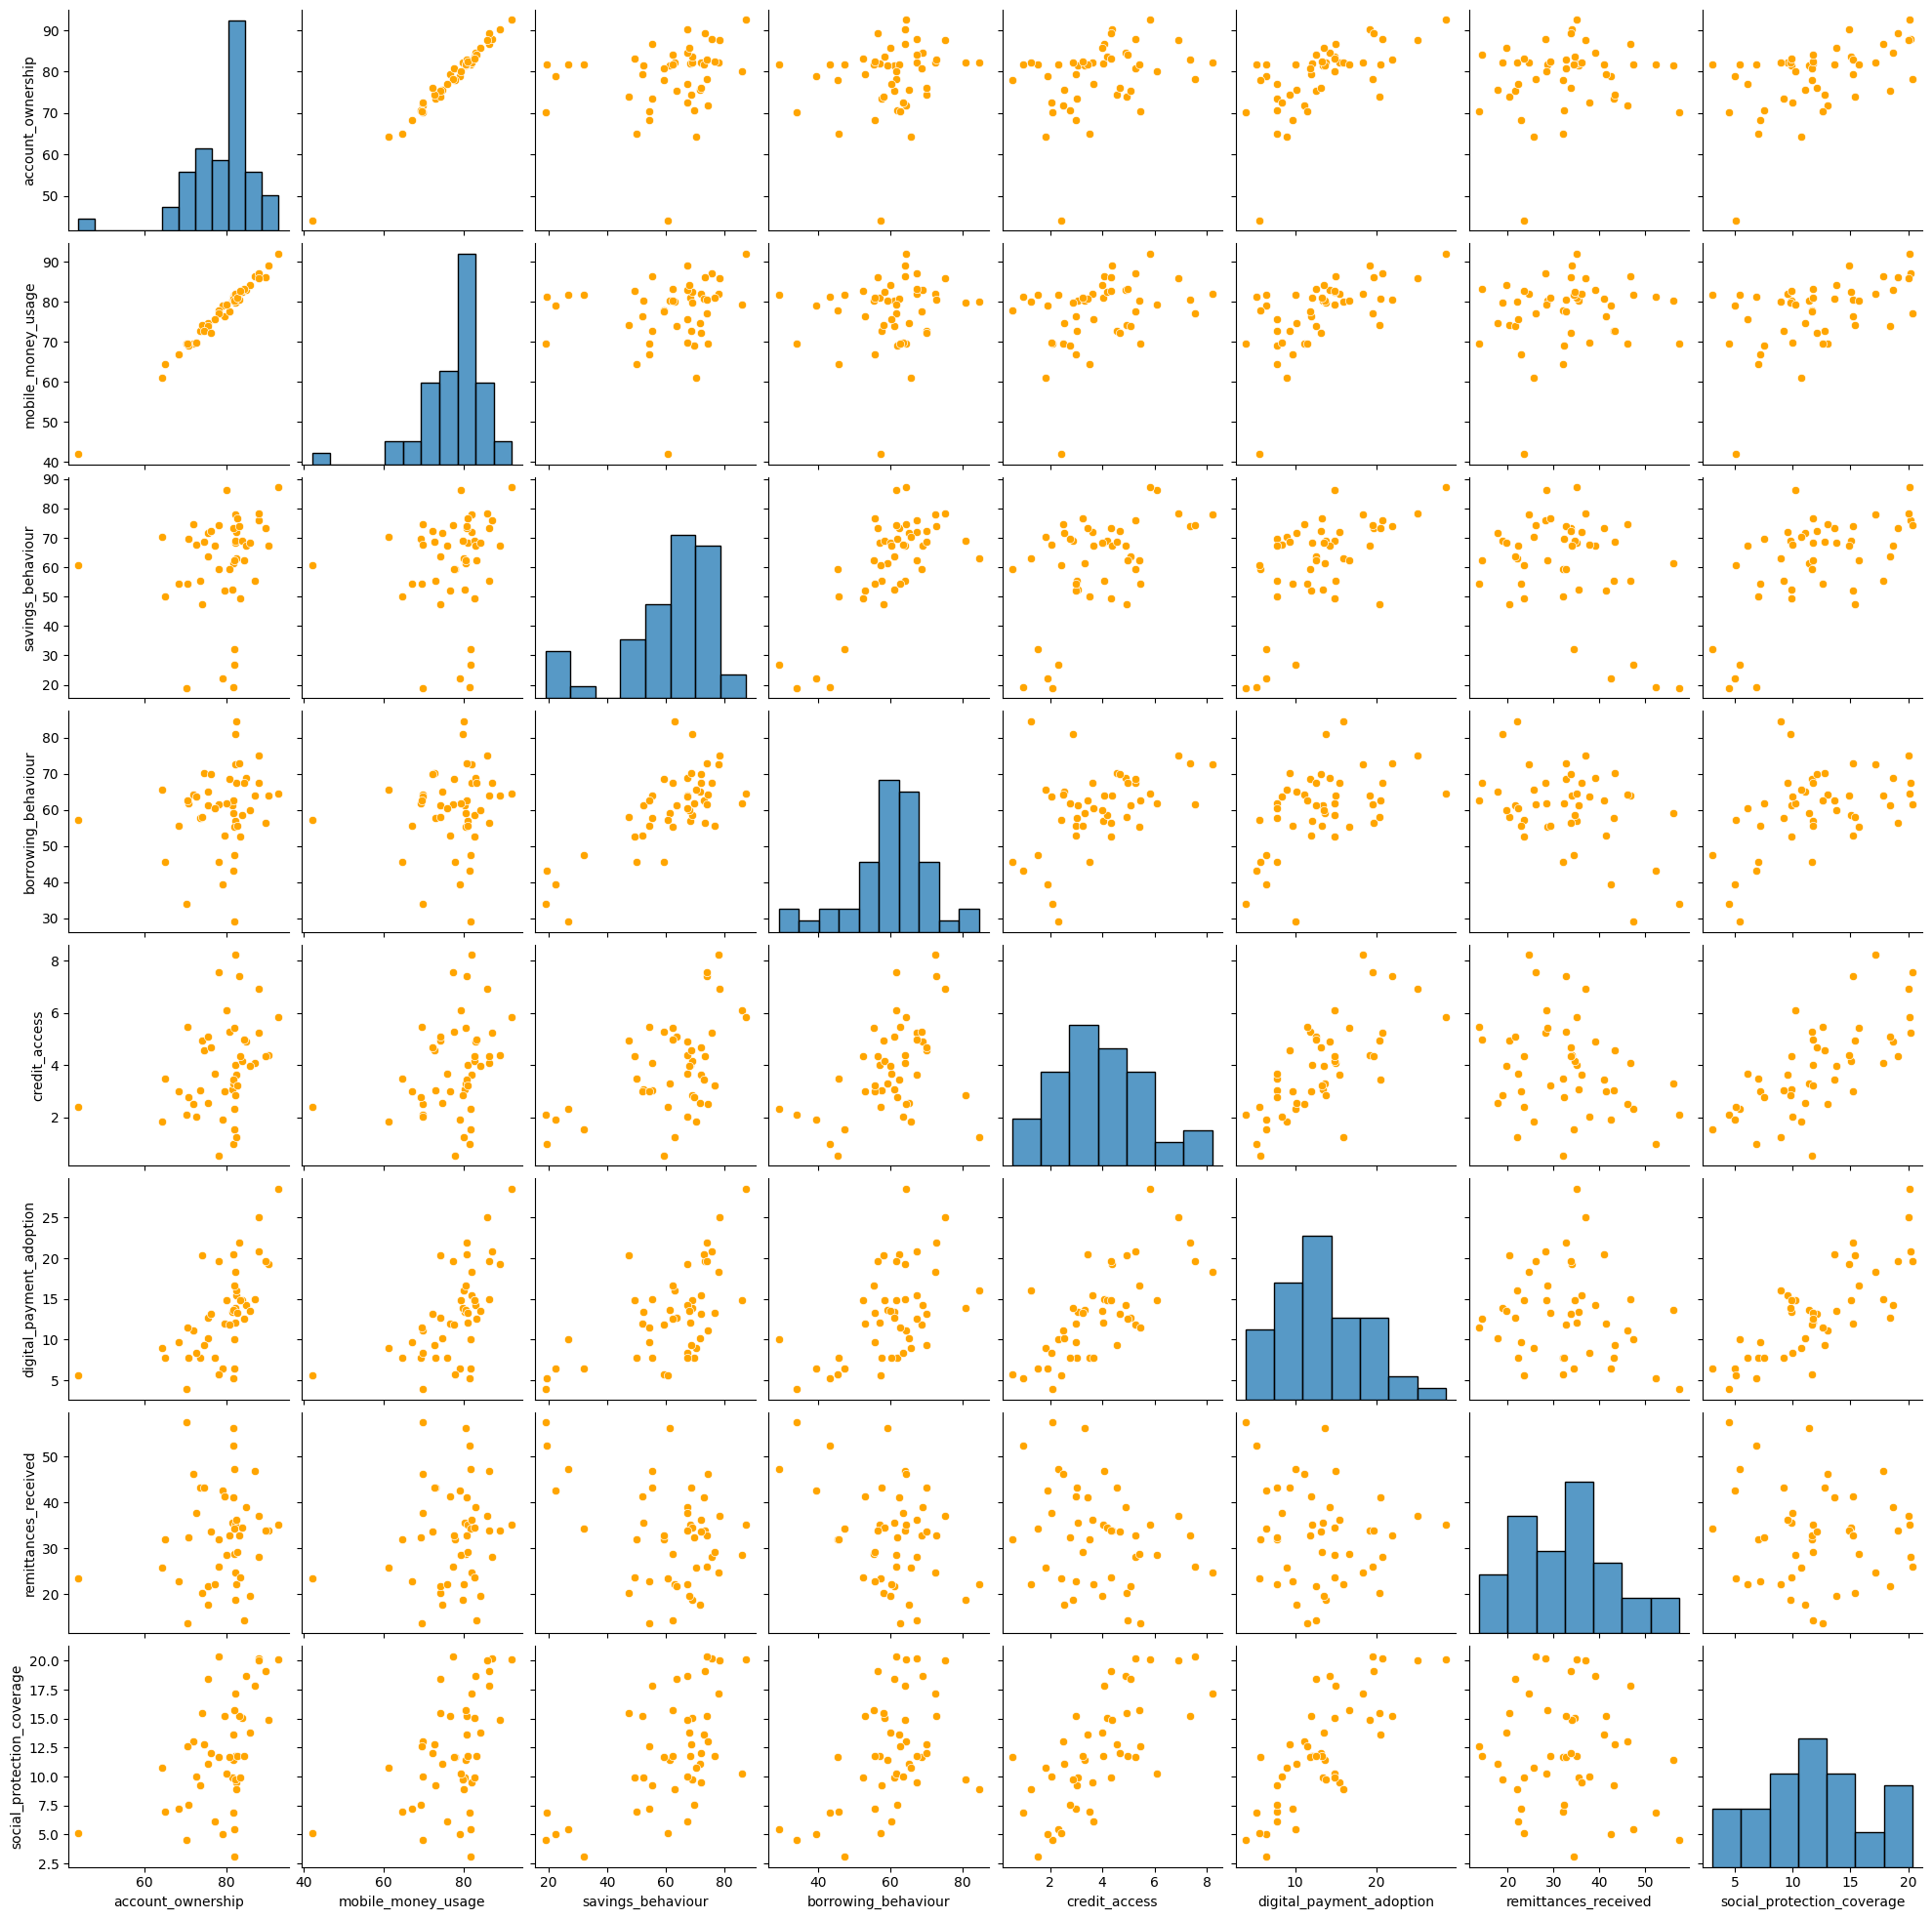

In [168]:
# Create pairwise scatterplots of continuous variables
sns.pairplot(finaccess_merged_summary[[
                   'account_ownership',
                   'mobile_money_usage',
                   'savings_behaviour',
                   'borrowing_behaviour',
                   'credit_access',
                   'digital_payment_adoption',
                   'remittances_received',
                   'social_protection_coverage']],
             plot_kws={'color': 'orange'})

# Show the plot
plt.show()

We observe a strong correlation between bank account ownership and mobile money usage. Savings behavior and borrowing behavior also show notable correlations. Additionally, credit access, digital payment adoption, and social protection coverage appear to be linked, possibly reflecting individuals with higher levels of financial access.

## 4 Conclusions and Recommendations

### 4.1 Patterns of Financial Inclusion

Bank account ownership (including mobile bank accounts) and mobile money usage are relatively evenly distributed across Kenya's counties, suggesting widespread access to basic financial services — particularly mobile money.

Savings behavior and remittances received from abroad show significant variation between counties, indicating differing levels of economic activity and household financial strategies.

Credit access, digital payment adoption, and social protection coverage are generally low across Kenya, highlighting persistent challenges in accessing more advanced financial services and support systems.

### 4.2 Correlations with Economic Opportunity

Mobile phone ownership is widespread across Kenya and strongly correlated with mobile money usage, underscoring the central role mobile phones play in facilitating financial access.

Correlations are observed between financial inclusion indicators (e.g., savings and borrowing behavior) and economic opportunity variables such as mobile phone ownership, internet access, and unemployment rate. This suggests that areas with greater economic opportunity tend to exhibit higher levels of financial inclusion.

The consistently low levels of credit access and social protection coverage point to a widespread gap in financial security, especially in rural or economically disadvantaged regions.

There is also a clear relationship between unemployment and informal employment rates and financial inclusion, indicating that limited formal employment opportunities may restrict access to formal financial services.

### 4.3 Recommendations

This analysis highlights both strengths (e.g., widespread mobile money usage) and ongoing challenges (e.g., limited access to credit and social protection) in Kenya’s financial inclusion landscape. It suggests that financial inclusion is closely tied to access to mobile technology and broader economic opportunity.

To improve financial inclusion, efforts should prioritize expanding access to credit, digital payment systems, and social protection — particularly in areas with high unemployment and informal employment.

Given the central role of mobile phones in enabling financial access, expanding digital financial infrastructure in rural and underserved areas could help close remaining gaps and reach more vulnerable populations.